In [342]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from IPython.core.display import display, HTML
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

In [2]:
# Загрузка данных лист

In [3]:
posts_list_df = pd.read_csv('data/posts_list.csv', sep='\t', parse_dates=['created_datetime'])
posts_list_df.head()

,page_id,id,caption,created_datetime,from_group,link,message,name,parent_id,status_type,story,type_of_post
0,563554503788475,563554503788475_1278084155668836,NaN,2018-01-15 18:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,5 unusual ideas for lamp design!,Tips & Tricks,165608444009109_210691262834160,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
1,563554503788475,563554503788475_1279214485555803,amostars.com,2018-01-15 04:30:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22170-kelly-ripas-marriag...,No way!,Kelly Ripa's marriage is not as simple as it s...,NaN,shared_story,Wikr.com with AmoStars.com.,link
2,563554503788475,563554503788475_1279384765538775,amostars.com,2018-01-15 11:30:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22166-ricky-nelsons-daugh...,Ricky Nelson's daughter is a 54-year-old actre...,Ricky Nelson's daughter is a 54-year-old actre...,NaN,shared_story,Wikr.com with AmoStars.com.,link
3,563554503788475,563554503788475_1279490172194901,amostars.com,2018-01-15 13:30:01,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22180-after-30-years-gold...,Just take a look at these touching photos!,"After 30 years together, Goldie Hawn and Kurt ...",NaN,shared_story,Wikr.com with AmoStars.com.,link
4,563554503788475,563554503788475_1279624938848091,NaN,2018-01-16 07:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/wikrcom/videos/127962...,It happens that we ask life for one thing and ...,It happens that we ask life for one thing and ...,NaN,added_video,NaN,video


In [336]:
# Вывод короткого анализа данных

In [4]:
pp.ProfileReport(posts_list_df, check_correlation = False)

Number of variables,12
Number of observations,419
Total Missing (%),13.8%
Total size in memory,39.4 KiB
Average record size in memory,96.2 B
Numeric,0
Categorical,7
Boolean,0
Date,1
Text (Unique),2
Rejected,2


In [5]:
print(posts_list_df.shape)
posts_list_df.isna().sum()

(419, 12)


page_id               0
id                    0
caption              66
created_datetime      0
from_group            0
link                  0
message               4
name                 15
parent_id           377
status_type           0
story               232
type_of_post          0
dtype: int64

In [ ]:
# Загрузка данных инсайтов

In [6]:
posts_insights_df = pd.read_csv('data/posts_insights.csv', sep='\t', parse_dates=['update_time'])
posts_insights_df.head()

,post_id,update_time,post_consumptions_by_type,post_consumptions_by_type_unique,post_impressions,post_impressions_unique,post_impressions_viral,post_impressions_viral_unique,post_video_views,post_video_views_10s,post_video_view_time,post_video_avg_time_watched,post_stories_by_action_type,post_storytellers_by_action_type
0,563554503788475_1276954415781810,2018-01-15 20:44:06,{},{},0,0,0,0,0,0,0,0,{},{}
1,563554503788475_1276954415781810,2018-01-15 20:49:06,{},{},0,0,0,0,1327,0,0,0,{},{}
2,563554503788475_1276954415781810,2018-01-15 20:54:07,{},{},0,0,0,0,1327,0,0,0,{},{}
3,563554503788475_1276954415781810,2018-01-15 20:59:07,{},{},0,0,0,0,5374,0,0,0,{},{}
4,563554503788475_1276954415781810,2018-01-15 21:04:07,{},{},0,0,0,0,8532,0,0,0,{},{}


In [ ]:
# Вывод короткого анализа данных

In [7]:
pp.ProfileReport(posts_insights_df, check_correlation = False)

Number of variables,14
Number of observations,18965
Total Missing (%),0.0%
Total size in memory,2.0 MiB
Average record size in memory,112.0 B
Numeric,8
Categorical,5
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [8]:
print(posts_insights_df.shape)
posts_insights_df.isna().sum()

(18965, 14)


post_id                             0
update_time                         0
post_consumptions_by_type           0
post_consumptions_by_type_unique    0
post_impressions                    0
post_impressions_unique             0
post_impressions_viral              0
post_impressions_viral_unique       0
post_video_views                    0
post_video_views_10s                0
post_video_view_time                0
post_video_avg_time_watched         0
post_stories_by_action_type         0
post_storytellers_by_action_type    0
dtype: int64

# Анализ категориальных переменных

In [10]:
posts_list_df.status_type.value_counts()

shared_story            353
mobile_status_update     42
added_photos             15
added_video               9
Name: status_type, dtype: int64

In [11]:
posts_list_df.type_of_post.value_counts()

link     353
video     51
photo     15
Name: type_of_post, dtype: int64

In [12]:
posts_list_df.story.value_counts(dropna=False)

NaN                                       232
Wikr.com with AmoStars.com.                56
Wikr.com shared Tips & Tricks's video.     28
Wikr.com with Family World.                25
Wikr.com with Bored Panda.                 24
Wikr.com shared Family World's video.      14
Wikr.com with LittleThings.                11
Wikr.com with Bolde.com.                    7
Wikr.com with Shared.                       6
Wikr.com with Meaww.                        5
Wikr.com with Wide Open Country.            4
Wikr.com with Throwbacks.                   3
Wikr.com with VIX.                          3
Wikr.com with Wink.                         1
Name: story, dtype: int64

In [13]:
posts_list_df.caption.value_counts(dropna=False)

fabiosa.guru           207
NaN                     66
amostars.com            57
mambee.com              25
boredpanda.com          24
littlethings.com        11
bolde.com                7
shared.com               6
ia.meaww.com             5
wideopencountry.com      4
vix.com                  3
throwbacks.com           3
wink.guru                1
Name: caption, dtype: int64

## Можно выделить несколько видов постов:
## 1) в разрезе status_type есть три категории:

In [15]:
list(posts_list_df.status_type.value_counts().index)

['shared_story', 'mobile_status_update', 'added_photos', 'added_video']

## Причём:
## shared_story являются link типом из признака type_of_post
## added_photos являются photo типом из признака type_of_post
## mobile_status_update и added_video являются video типом из признака type_of_post

# 2) в разрезе caption есть категории:

In [18]:
list(posts_list_df.caption.value_counts().index)

['fabiosa.guru',
 'amostars.com',
 'mambee.com',
 'boredpanda.com',
 'littlethings.com',
 'bolde.com',
 'shared.com',
 'ia.meaww.com',
 'wideopencountry.com',
 'vix.com',
 'throwbacks.com',
 'wink.guru']

# 3) в разрене story есть категории:

In [20]:
list(posts_list_df.story.value_counts().index)

['Wikr.com with AmoStars.com.',
 "Wikr.com shared Tips & Tricks's video.",
 'Wikr.com with Family World.',
 'Wikr.com with Bored Panda.',
 "Wikr.com shared Family World's video.",
 'Wikr.com with LittleThings.',
 'Wikr.com with Bolde.com.',
 'Wikr.com with Shared.',
 'Wikr.com with Meaww.',
 'Wikr.com with Wide Open Country.',
 'Wikr.com with Throwbacks.',
 'Wikr.com with VIX.',
 'Wikr.com with Wink.']

## Причём:
## story и caption похожи между собой, проанализируем на аутлаеры
## Все записи со значением caption = fabiosa.guru имеют пустые записи в story
## Одна запись со значением caption = amostars.com имеeт пустую запись в story

## Все записи со значением story = Wikr.com shared Tips & Tricks's video. имеют пустые записи в caption
## Все записи со значением story = Wikr.com shared Family World's video. имеют пустые записи в caption

## Остальные типы постов в story и caption дублируют друг друга

# Анализ пустых записей

In [23]:
posts_list_df[posts_list_df.caption == 'fabiosa.guru'].shape

(207, 12)

In [24]:
posts_list_df[posts_list_df.caption == 'fabiosa.guru'].type_of_post.value_counts()

link    207
Name: type_of_post, dtype: int64

In [25]:
posts_list_df[posts_list_df.caption == 'fabiosa.guru'].status_type.value_counts()

shared_story    207
Name: status_type, dtype: int64

In [26]:
posts_list_df[posts_list_df.caption == 'fabiosa.guru'].parent_id.isna().sum()

207

# Все записи со значением caption = fabiosa.guru имеют status_type = shared_story
# Все записи со значением caption = fabiosa.guru имеют type_of_post = link 
# также parent_id на всех объектах имеет пустое значение

In [28]:
posts_list_df[posts_list_df.caption == 'amostars.com'].shape

(57, 12)

In [29]:
posts_list_df[posts_list_df.caption == 'amostars.com'].type_of_post.value_counts()

link    57
Name: type_of_post, dtype: int64

In [30]:
posts_list_df[posts_list_df.caption == 'amostars.com'].status_type.value_counts()

shared_story    57
Name: status_type, dtype: int64

In [31]:
posts_list_df[posts_list_df.caption == 'amostars.com'].parent_id.isna().sum()

57

# Все записи со значением caption = amostars.com имеют status_type = shared_story
# Все записи со значением caption = amostars.com имеют type_of_post = link 
# также parent_id на всех объектах имеет пустое значение

In [33]:
posts_list_df[posts_list_df.story == "Wikr.com shared Tips & Tricks's video."].shape

(28, 12)

In [34]:
posts_list_df[posts_list_df.story == "Wikr.com shared Tips & Tricks's video."]

,page_id,id,caption,created_datetime,from_group,link,message,name,parent_id,status_type,story,type_of_post
0,563554503788475,563554503788475_1278084155668836,NaN,2018-01-15 18:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,5 unusual ideas for lamp design!,Tips & Tricks,165608444009109_210691262834160,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
24,563554503788475,563554503788475_1280207115456540,NaN,2018-01-18 20:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,Learning to fold napkins beautifully in order ...,Tips & Tricks,165608444009109_211722276064392,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
38,563554503788475,563554503788475_1280043888806196,NaN,2018-01-17 11:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,Simple tips for strengthening your nails at home!,Tips & Tricks,165608444009109_211629226073697,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
58,563554503788475,563554503788475_1280215102122408,NaN,2018-01-18 01:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,Tired of burning your hands on hot ovens? We'l...,Tips & Tricks,165608444009109_211724516064168,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
65,563554503788475,563554503788475_1280978152046103,NaN,2018-01-19 11:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,Old shirts keep my feet warm!,Tips & Tricks,165608444009109_212096182693668,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
69,563554503788475,563554503788475_1281629015314350,NaN,2018-01-19 18:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,How to make a live art object from a table wor...,Tips & Tricks,165608444009109_212355772667709,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
124,563554503788475,563554503788475_1280763608734224,NaN,2018-01-19 01:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,How about this life hack with glass jars? Now ...,Tips & Tricks,165608444009109_211991966037423,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
145,563554503788475,563554503788475_1277509769059608,NaN,2018-01-16 20:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,Life hack! Organizing your pet's food is so ea...,Tips & Tricks,165608444009109_210399216196698,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
150,563554503788475,563554503788475_1279702758840309,NaN,2018-01-17 01:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,"Oh God, this is that recipe for the famous blu...",Tips & Tricks,165608444009109_211465069423446,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video
179,563554503788475,563554503788475_1279384158872169,NaN,2018-01-16 04:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,Aromatic candles made by hand.,Tips & Tricks,165608444009109_211298852773401,mobile_status_update,Wikr.com shared Tips & Tricks's video.,video


In [35]:
# Все записи со значением story = Wikr.com shared Tips & Tricks's video. которые имеют пустые записи в caption  имеют константные записи в полях name, status_type, type_of_post

In [36]:
posts_list_df[posts_list_df.story == "Wikr.com shared Family World's video."].shape

(14, 12)

In [37]:
posts_list_df[posts_list_df.story == "Wikr.com shared Family World's video."]

,page_id,id,caption,created_datetime,from_group,link,message,name,parent_id,status_type,story,type_of_post
49,563554503788475,563554503788475_1281287012015217,NaN,2018-01-18 02:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,What does a baby think in its mother's belly?,Family World,1776663672362366_1924189680943097,mobile_status_update,Wikr.com shared Family World's video.,video
94,563554503788475,563554503788475_1281446498665935,NaN,2018-01-18 16:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,This is a story about the power of the human h...,Family World,1776663672362366_1924595787569153,mobile_status_update,Wikr.com shared Family World's video.,video
109,563554503788475,563554503788475_1282555651888353,NaN,2018-01-19 16:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,Love should be stronger than hate.,Family World,1776663672362366_1926235930738472,mobile_status_update,Wikr.com shared Family World's video.,video
118,563554503788475,563554503788475_1279850215492230,NaN,2018-01-16 09:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,Getting the right amount of sleep is essential...,Family World,1776663672362366_1922101667818565,mobile_status_update,Wikr.com shared Family World's video.,video
157,563554503788475,563554503788475_1280751468735438,NaN,2018-01-17 16:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,Fun dinosaur dishes for kids.,Family World,1776663672362366_1923534914341907,mobile_status_update,Wikr.com shared Family World's video.,video
181,563554503788475,563554503788475_1279647688845816,NaN,2018-01-16 02:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,Reasons why a lip balm should be added in a ho...,Family World,1776663672362366_1921751524520246,mobile_status_update,Wikr.com shared Family World's video.,video
199,563554503788475,563554503788475_1282001791943739,NaN,2018-01-19 02:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,His mother helped him to become a legend.,Family World,1776663672362366_1925331414162257,mobile_status_update,Wikr.com shared Family World's video.,video
228,563554503788475,563554503788475_1279073478903237,NaN,2018-01-15 09:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,Why it is important to say goodbye.,Family World,1776663672362366_1920823767946355,mobile_status_update,Wikr.com shared Family World's video.,video
279,563554503788475,563554503788475_1279003505576901,NaN,2018-01-15 02:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,The highest price.,Family World,1776663672362366_1920708301291235,mobile_status_update,Wikr.com shared Family World's video.,video
319,563554503788475,563554503788475_1280668202077098,NaN,2018-01-17 09:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/1776663672362366/vide...,The story of a couple who was scared of having...,Family World,1776663672362366_1923445261017539,mobile_status_update,Wikr.com shared Family World's video.,video


## Все записи со значением story = Wikr.com shared Family World's video. которые имеют пустые записи в caption имеют константные записи в полях name, status_type, type_of_post

# Пункт 2

## Выделим количество постов в группе в разрезе трех признаков status_type, caption, story

In [40]:
posts_list_df['created_date'] = posts_list_df.created_datetime.dt.date
posts_list_df['created_time'] = posts_list_df.created_datetime.dt.time

In [41]:
ct_status_type = pd.crosstab(posts_list_df['created_date'], posts_list_df['status_type'])

In [42]:
ct_status_type

status_type,added_photos,added_video,mobile_status_update,shared_story
created_date,,,,
2018-01-15,3,2,9,63
2018-01-16,1,2,10,70
2018-01-17,3,1,6,72
2018-01-18,3,2,8,71
2018-01-19,5,2,9,77


([<matplotlib.axis.YTick at 0x7ff5fbc11668>,
 <a list of 16 Text yticklabel objects>)

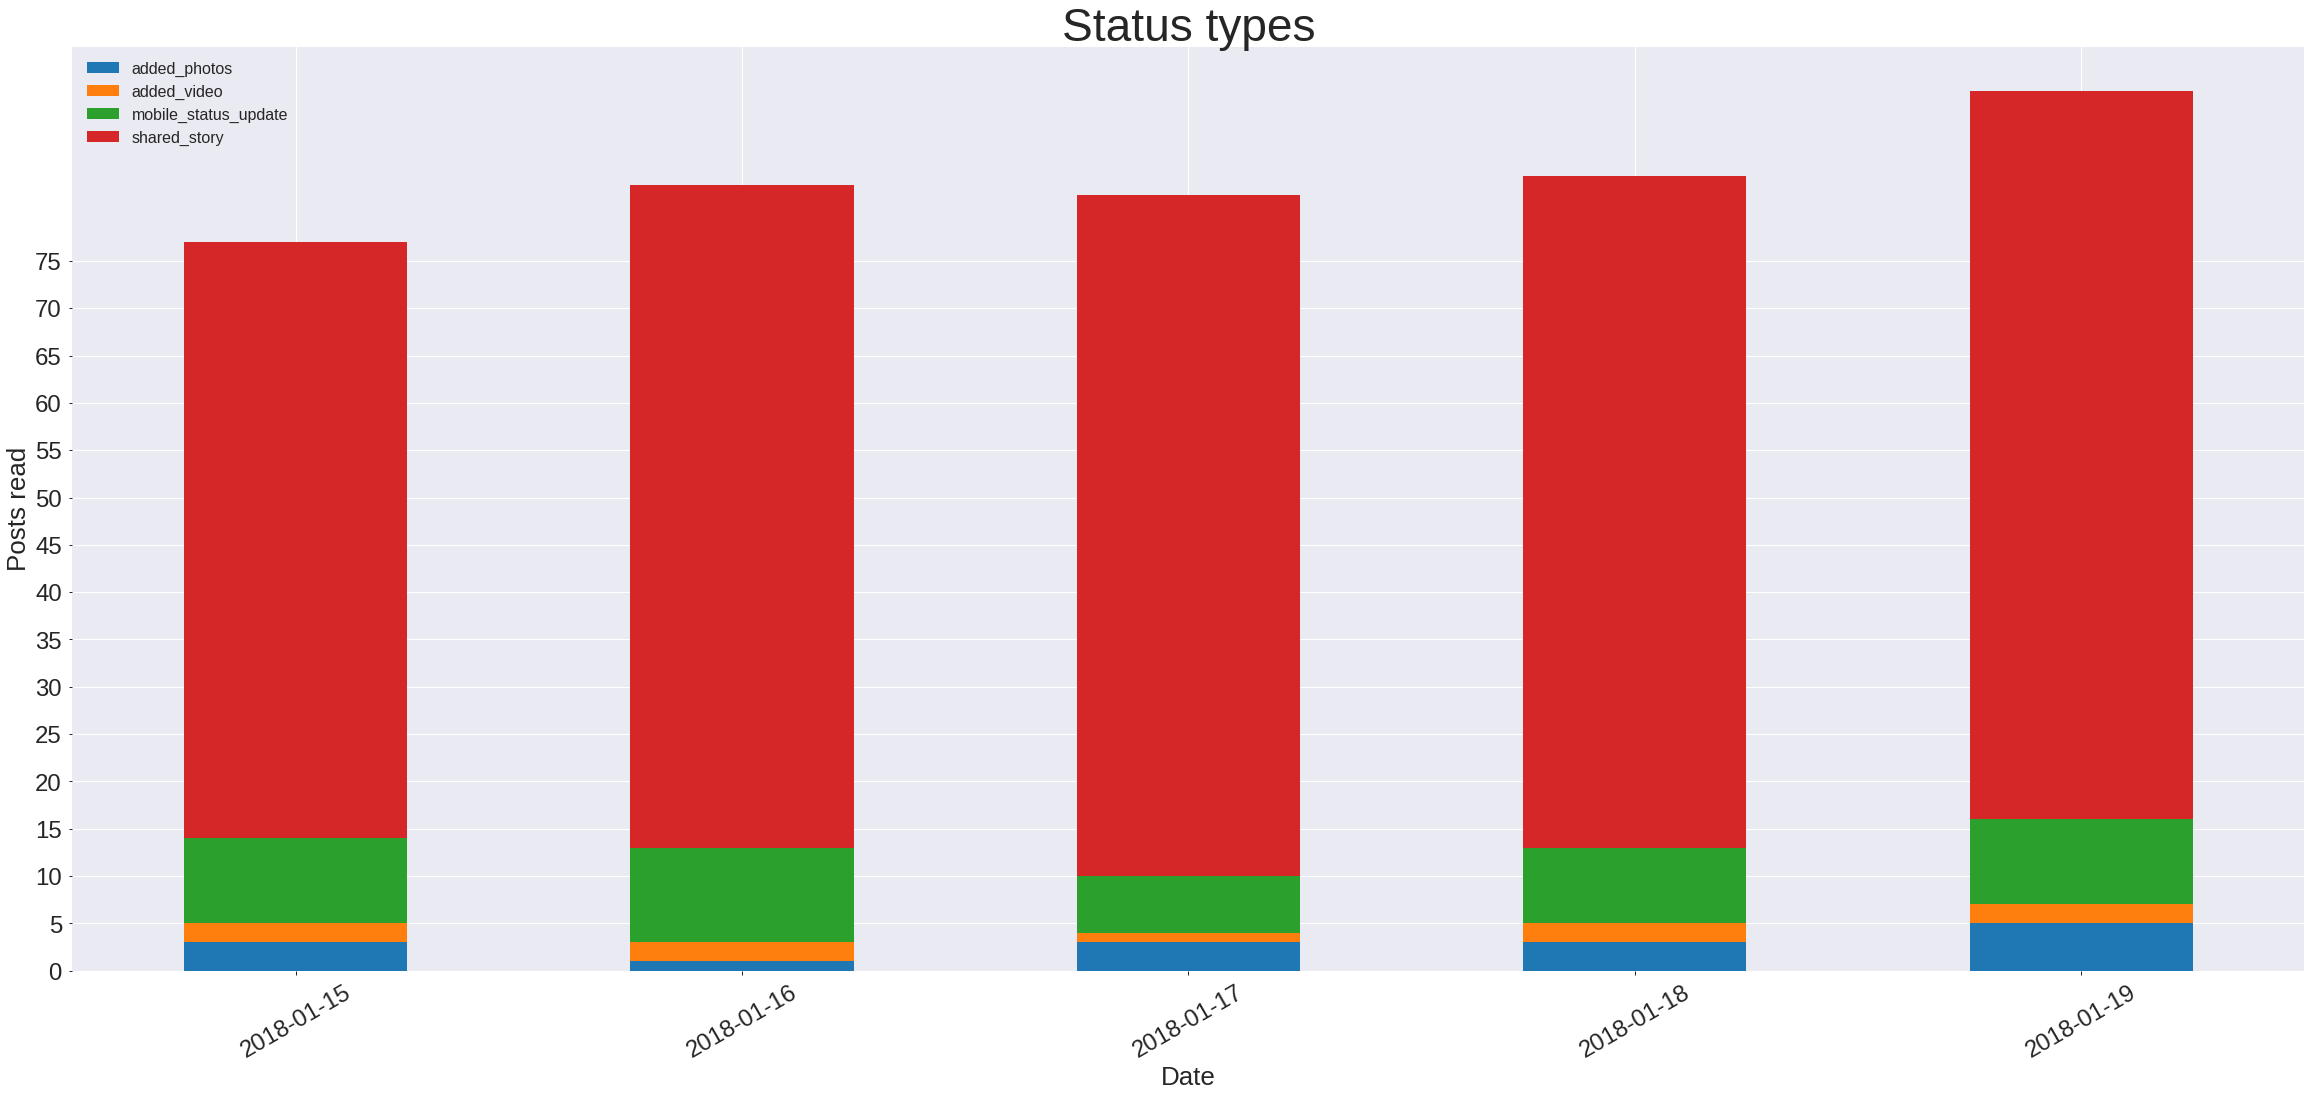

In [351]:
ct_status_type.plot.bar(stacked=True, figsize=(40,17))
plt.legend(prop={'size': 16})
plt.title('Status types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Posts read', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)
plt.yticks(np.arange(0, 80, 5.0))

In [44]:
ct_caption = pd.crosstab(posts_list_df['created_date'], posts_list_df['caption'])

In [45]:
ct_caption

caption,amostars.com,bolde.com,boredpanda.com,fabiosa.guru,ia.meaww.com,littlethings.com,mambee.com,shared.com,throwbacks.com,vix.com,wideopencountry.com,wink.guru
created_date,,,,,,,,,,,,
2018-01-15,15,0,5,34,0,3,5,1,0,0,0,0
2018-01-16,14,1,5,41,0,2,5,1,1,0,0,0
2018-01-17,13,2,4,42,1,2,5,2,0,0,0,1
2018-01-18,9,2,4,42,2,2,5,2,0,1,2,0
2018-01-19,6,2,6,48,2,2,5,0,2,2,2,0


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

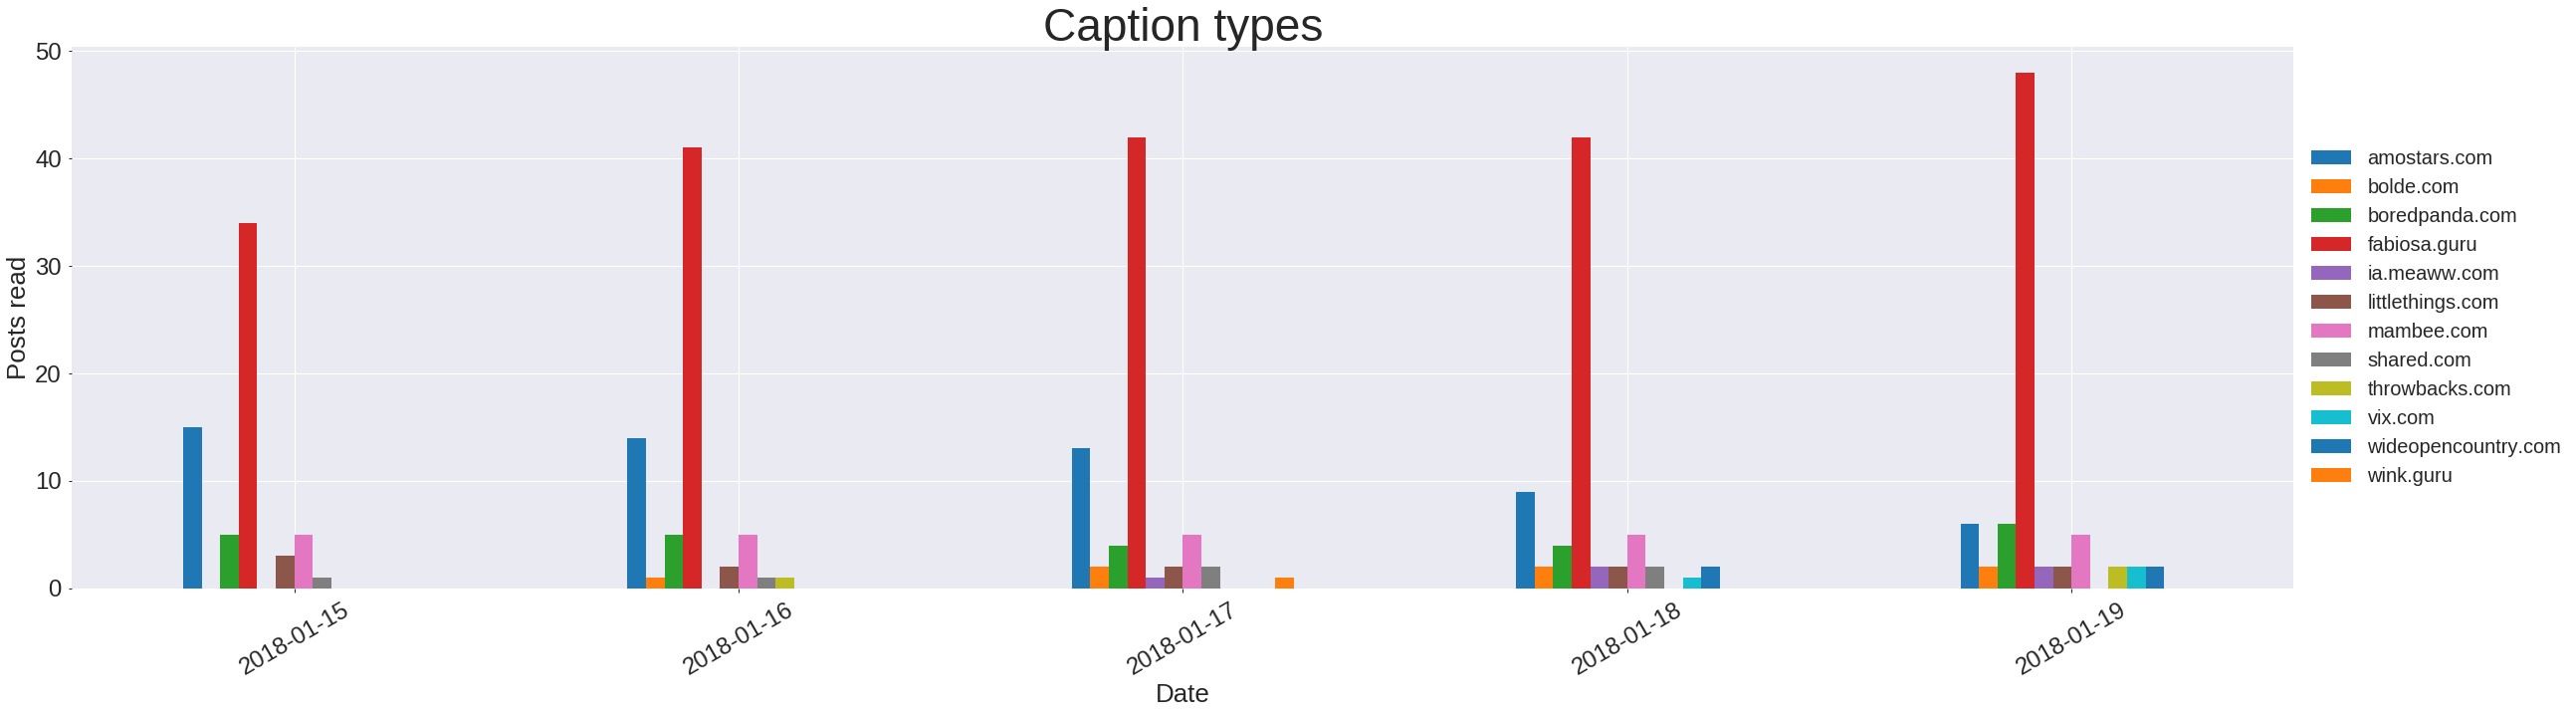

In [361]:
ct_caption.plot.bar(figsize=(40,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
plt.title('Caption types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Posts read', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)

In [47]:
ct_story = pd.crosstab(posts_list_df['created_date'], posts_list_df['story'])

In [48]:
ct_story

story,Wikr.com shared Family World's video.,Wikr.com shared Tips & Tricks's video.,Wikr.com with AmoStars.com.,Wikr.com with Bolde.com.,Wikr.com with Bored Panda.,Wikr.com with Family World.,Wikr.com with LittleThings.,Wikr.com with Meaww.,Wikr.com with Shared.,Wikr.com with Throwbacks.,Wikr.com with VIX.,Wikr.com with Wide Open Country.,Wikr.com with Wink.
created_date,,,,,,,,,,,,,
2018-01-15,3,6,15,0,5,5,3,0,1,0,0,0,0
2018-01-16,3,7,13,1,5,5,2,0,1,1,0,0,0
2018-01-17,2,4,13,2,4,5,2,1,2,0,0,0,1
2018-01-18,3,5,9,2,4,5,2,2,2,0,1,2,0
2018-01-19,3,6,6,2,6,5,2,2,0,2,2,2,0


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text yticklabel objects>)

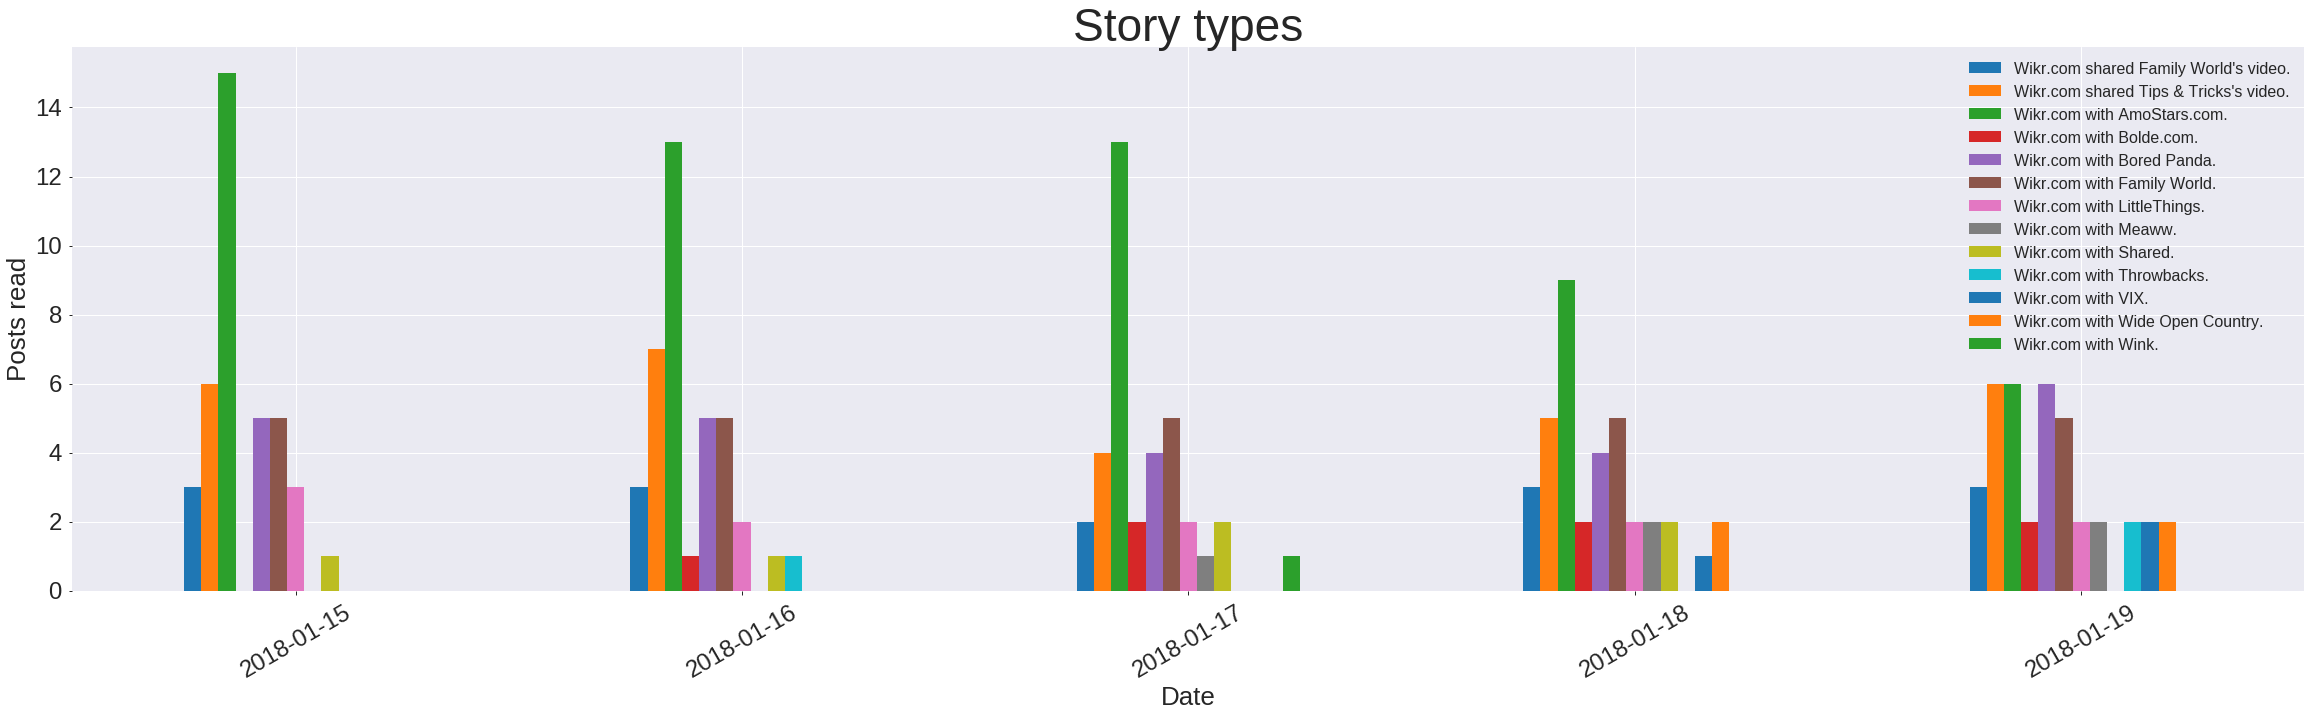

In [360]:
ct_story.plot.bar(figsize=(40,10))
plt.legend(loc=1, prop={'size': 16})
plt.title('Story types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Posts read', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)

# Пункт 3

In [50]:
posts_list_df.rename(columns={'id':'post_id'}, inplace=True)

In [51]:
merged_df = pd.merge(posts_list_df, posts_insights_df, on=['post_id', 'post_id'])

# page_id константное значение, удалим эту колонку

In [53]:
merged_df.drop(columns='page_id', inplace=True)

# Пункт 4 уже описан походу исполнения первых двоих пунктов, опысаны неточности связаные с пустыми значениями 

# Пункт 5

In [54]:
merged_df['time_from_published'] = merged_df['update_time'] - merged_df['created_datetime']

# отфильтруем данные у которых статус обновления близок к 10 часам

In [55]:
merged_df_less_10_hour = merged_df[merged_df['time_from_published'].dt.seconds//3600 < 10]

In [56]:
reached_df = merged_df_less_10_hour.groupby('post_id').tail(1)

# Сделаем таблицы по группам и визуализируем 

In [68]:
ct_reached_status_type = pd.crosstab(reached_df['created_date'], reached_df['status_type'], values=reached_df['post_impressions_unique'], aggfunc='sum')

In [69]:
ct_reached_status_type

status_type,added_photos,added_video,mobile_status_update,shared_story
created_date,,,,
2018-01-15,109081,247569,1583162,2637116
2018-01-16,108123,316252,1055045,2252886
2018-01-17,91029,228130,798634,2607144
2018-01-18,189124,193240,863357,3075743
2018-01-19,156685,225845,1072831,2016722


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.]),
 <a list of 6 Text yticklabel objects>)

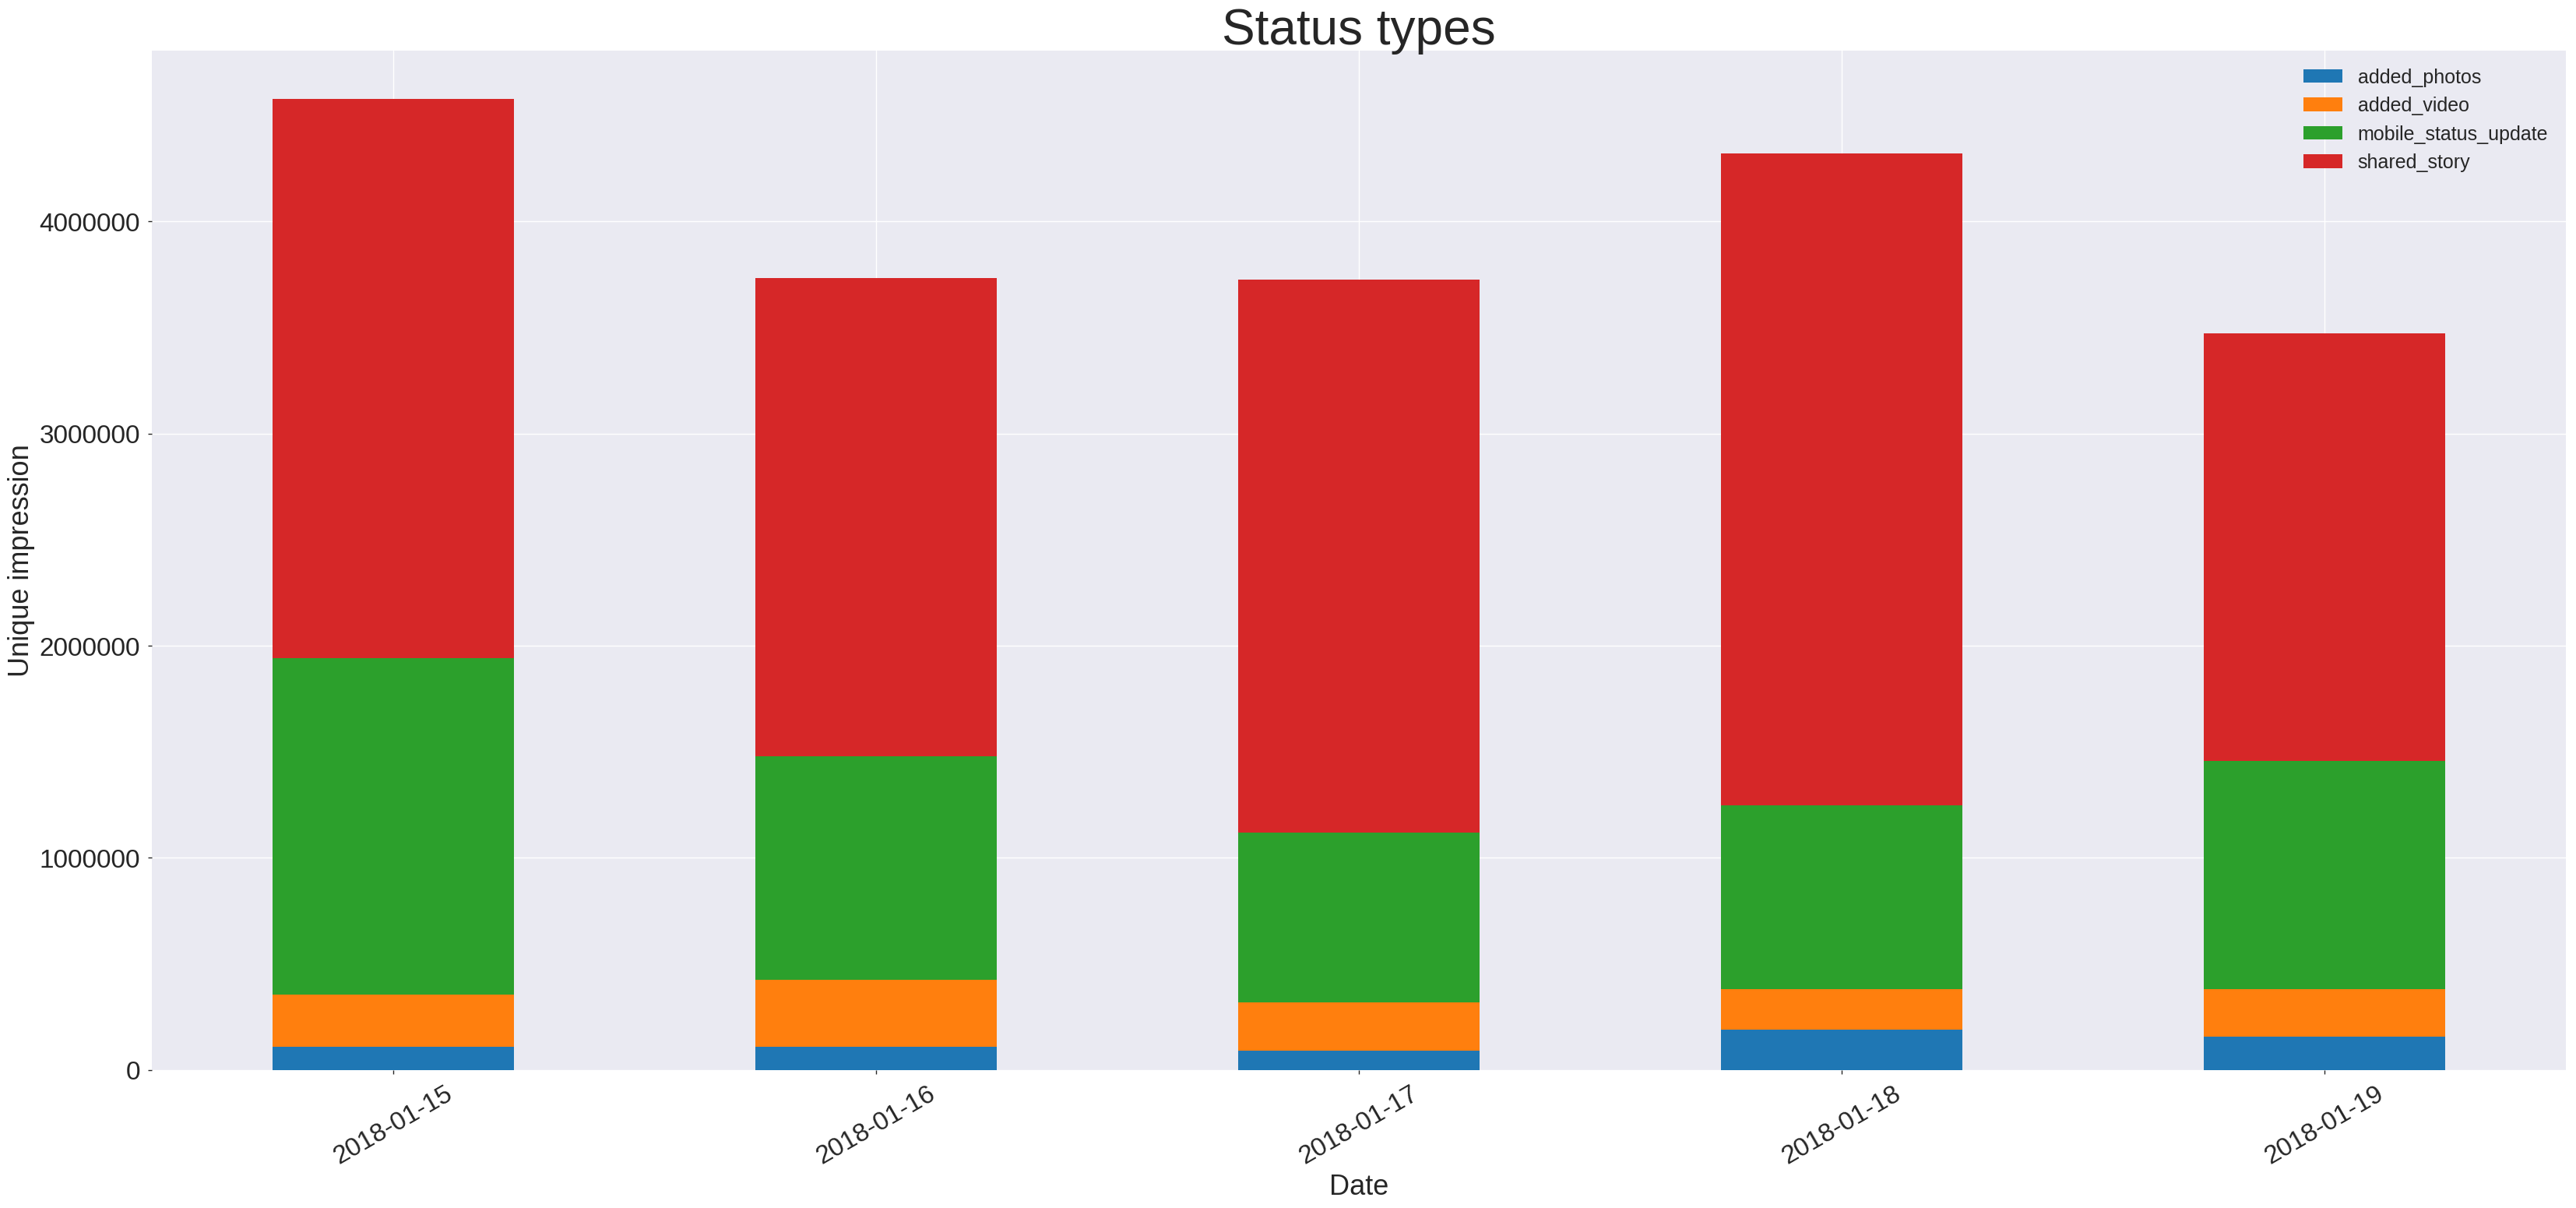

In [75]:
ct_reached_status_type.plot.bar(stacked=True, figsize=(40,17))
plt.legend(loc=1, prop={'size': 18})
plt.title('Status types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Unique impression', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)


In [71]:
ct_reached_caption = pd.crosstab(reached_df['created_date'], reached_df['caption'], values=reached_df['post_impressions_unique'], aggfunc='sum')

In [72]:
ct_reached_caption

caption,amostars.com,bolde.com,boredpanda.com,fabiosa.guru,ia.meaww.com,littlethings.com,mambee.com,shared.com,throwbacks.com,vix.com,wideopencountry.com,wink.guru
created_date,,,,,,,,,,,,
2018-01-15,449079.0,NaN,444654.0,1063721.0,NaN,99805.0,559145.0,20712.0,NaN,NaN,NaN,NaN
2018-01-16,458888.0,90181.0,136081.0,1299578.0,NaN,17139.0,174521.0,6551.0,69947.0,NaN,NaN,NaN
2018-01-17,366358.0,2090.0,196815.0,1610985.0,81546.0,18535.0,162992.0,26693.0,NaN,NaN,NaN,141130.0
2018-01-18,832838.0,7676.0,126243.0,1713290.0,33380.0,26861.0,160140.0,24851.0,NaN,26329.0,124135.0,NaN
2018-01-19,155654.0,21286.0,139234.0,1218583.0,20801.0,29951.0,323777.0,NaN,36229.0,32905.0,38302.0,NaN


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000.]),
 <a list of 10 Text yticklabel objects>)

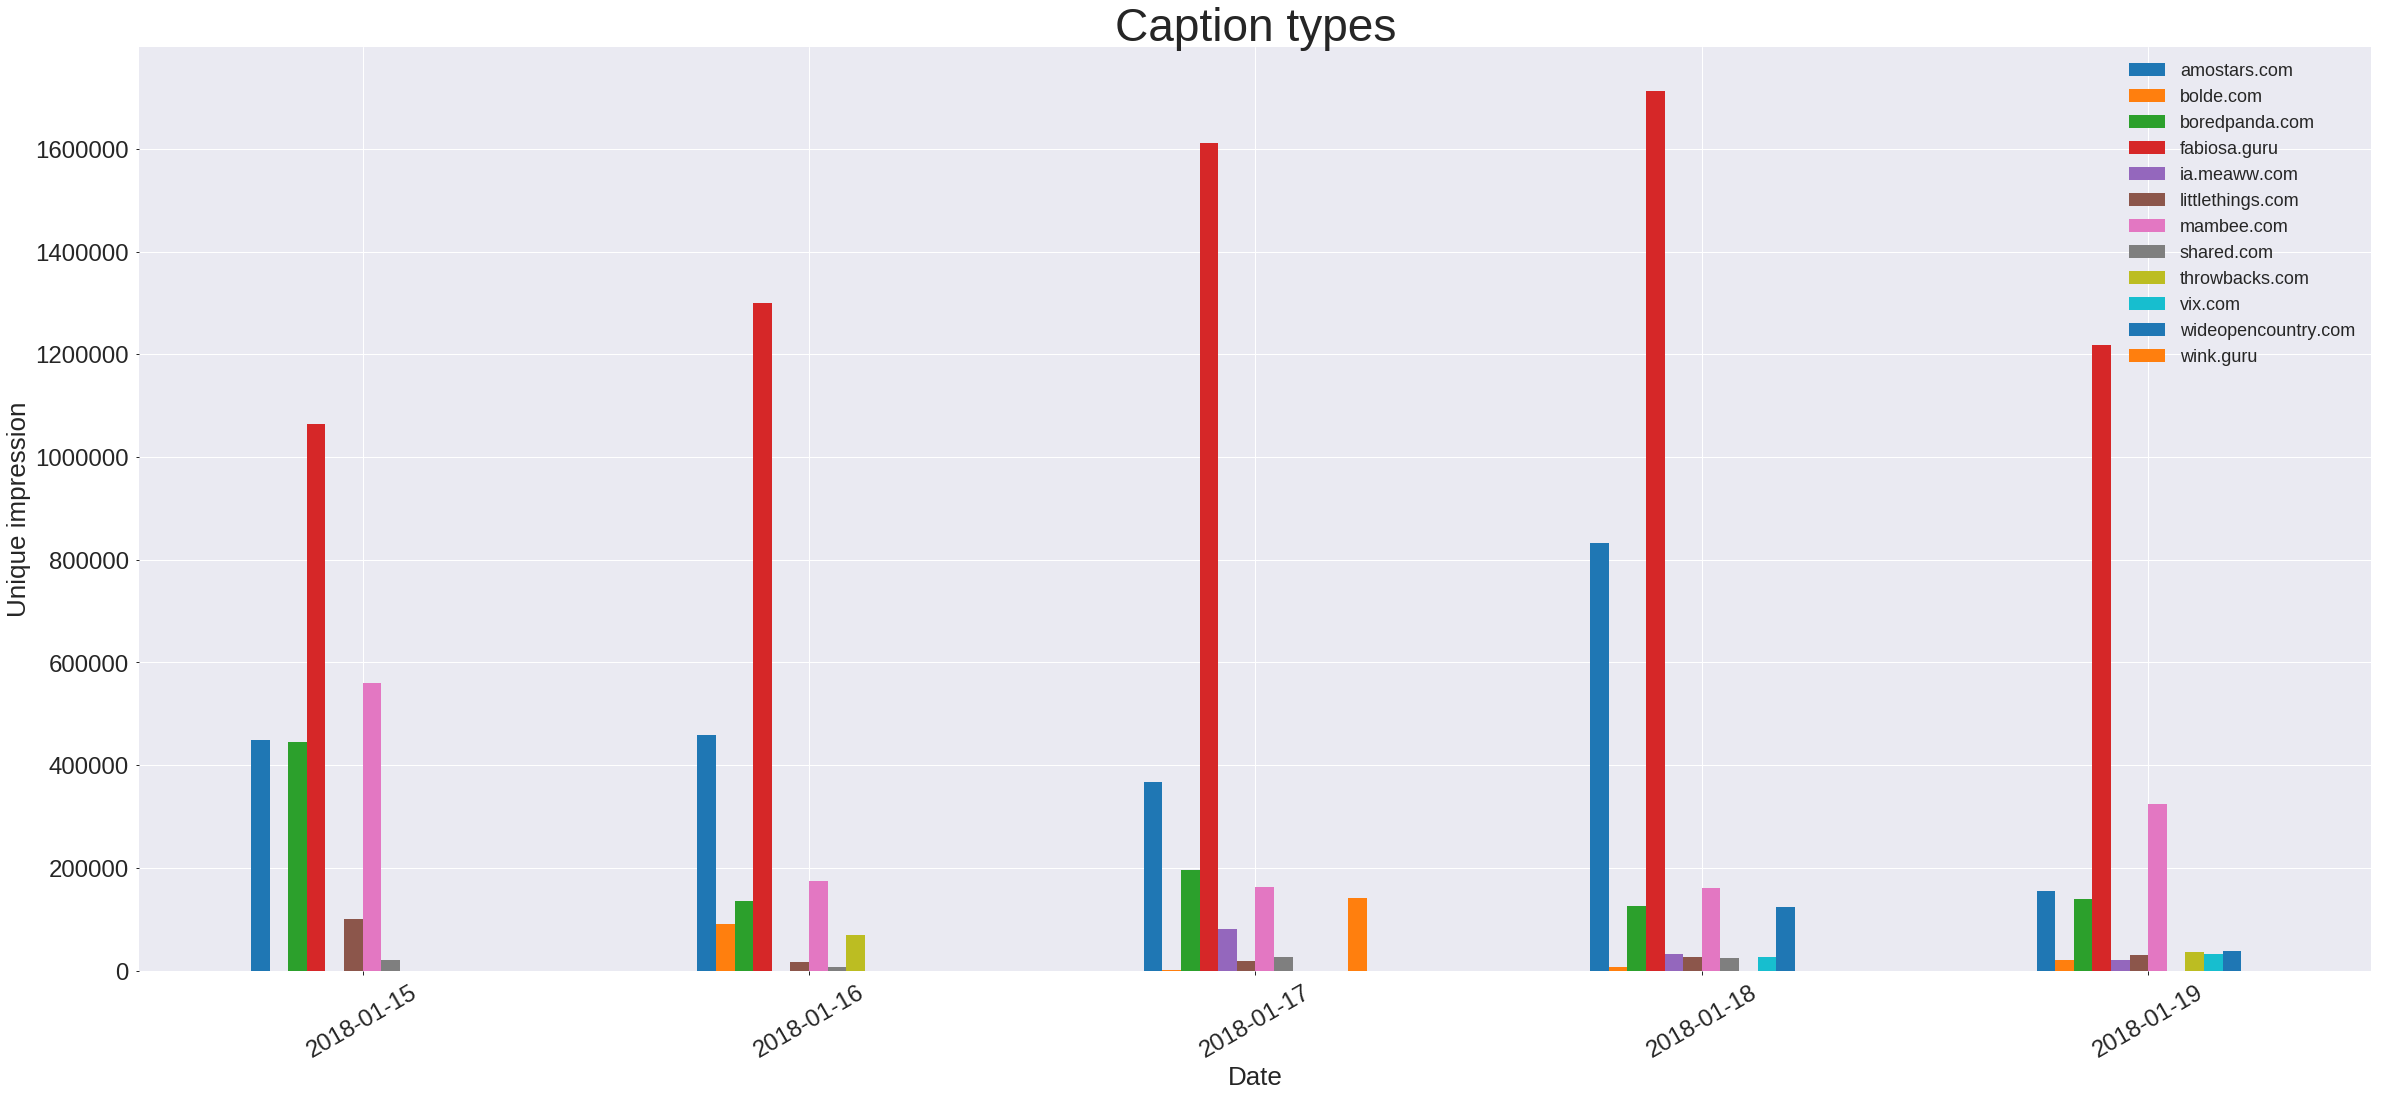

In [362]:
ct_reached_caption.plot.bar(figsize=(40,17))
plt.legend(loc=1, prop={'size': 18})
plt.title('Caption types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Unique impression', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)


In [364]:
ct_reached_story = pd.crosstab(reached_df['created_date'], reached_df['story'], values=reached_df['post_impressions_unique'], aggfunc='sum')

In [365]:
ct_reached_story

story,Wikr.com shared Family World's video.,Wikr.com shared Tips & Tricks's video.,Wikr.com with AmoStars.com.,Wikr.com with Bolde.com.,Wikr.com with Bored Panda.,Wikr.com with Family World.,Wikr.com with LittleThings.,Wikr.com with Meaww.,Wikr.com with Shared.,Wikr.com with Throwbacks.,Wikr.com with VIX.,Wikr.com with Wide Open Country.,Wikr.com with Wink.
created_date,,,,,,,,,,,,,
2018-01-15,397835.0,1185327.0,449079.0,NaN,444654.0,559145.0,99805.0,NaN,20712.0,NaN,NaN,NaN,NaN
2018-01-16,285596.0,769449.0,441377.0,90181.0,136081.0,174521.0,17139.0,NaN,6551.0,69947.0,NaN,NaN,NaN
2018-01-17,177747.0,620887.0,366358.0,2090.0,196815.0,162992.0,18535.0,81546.0,26693.0,NaN,NaN,NaN,141130.0
2018-01-18,420481.0,442876.0,832838.0,7676.0,126243.0,160140.0,26861.0,33380.0,24851.0,NaN,26329.0,124135.0,NaN
2018-01-19,243648.0,829183.0,155654.0,21286.0,139234.0,323777.0,29951.0,20801.0,NaN,36229.0,32905.0,38302.0,NaN


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000.]), <a list of 8 Text yticklabel objects>)

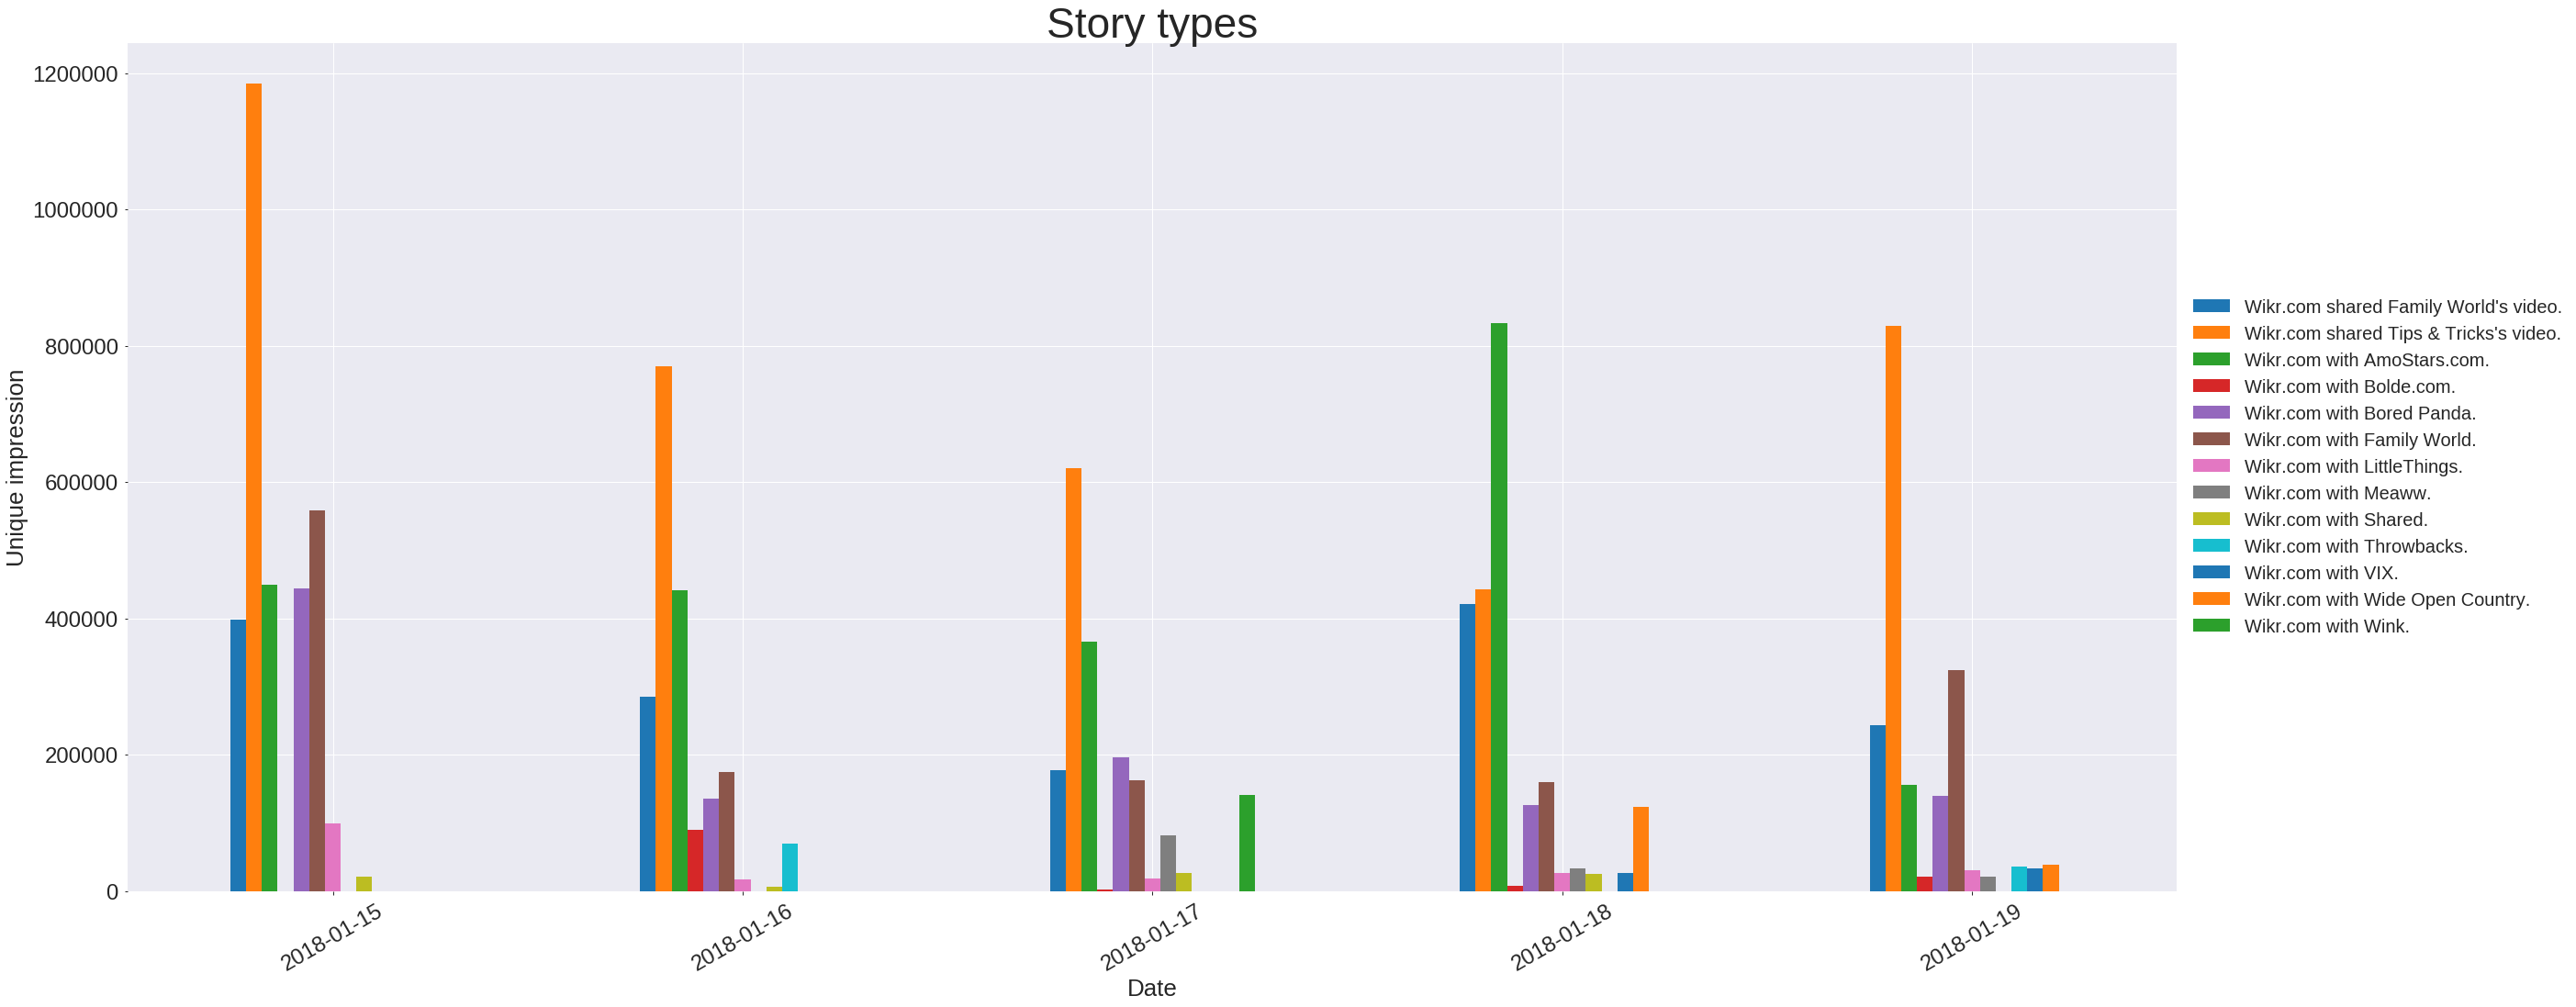

In [372]:
ct_reached_story.plot.bar(figsize=(40,17))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
plt.title('Story types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Unique impression', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)


# Пункт 6

In [344]:
extraction_df = reached_df

# Найдем коефициет и построим табличку с визуализацией

In [345]:
link_clicks = []
for i in reached_df.post_consumptions_by_type_unique.apply(lambda x: ast.literal_eval(x)).index:
    try:
        link_clicks.append(reached_df.post_consumptions_by_type_unique.apply(lambda x: ast.literal_eval(x))[i]['link clicks'])
    except:
        link_clicks.append(0)

In [346]:
reached_df['link_ckicks_post_consumptions_by_type_unique'] = link_clicks

In [347]:
extraction_coef = reached_df.post_impressions_unique / reached_df.link_ckicks_post_consumptions_by_type_unique

In [348]:
reached_df['extraction_coef'] = extraction_coef

In [130]:
ct_extraction_status_type = pd.crosstab(reached_df['created_date'], reached_df['status_type'], values=reached_df['extraction_coef'], aggfunc='sum')

In [134]:
ct_extraction_status_type.replace([np.inf, -np.inf], np.nan, inplace=True)

In [135]:
ct_extraction_status_type

status_type,added_photos,added_video,mobile_status_update,shared_story
created_date,,,,
2018-01-15,47858.155556,17142.269231,176834.930667,3150.499431
2018-01-16,9010.250000,24482.566667,87368.188413,NaN
2018-01-17,28496.625000,57032.500000,158646.599650,3696.869767
2018-01-18,11440.854167,47485.700000,134885.328431,3861.020043
2018-01-19,26854.722768,76687.571429,252356.200980,4359.149021


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]), <a list of 9 Text yticklabel objects>)

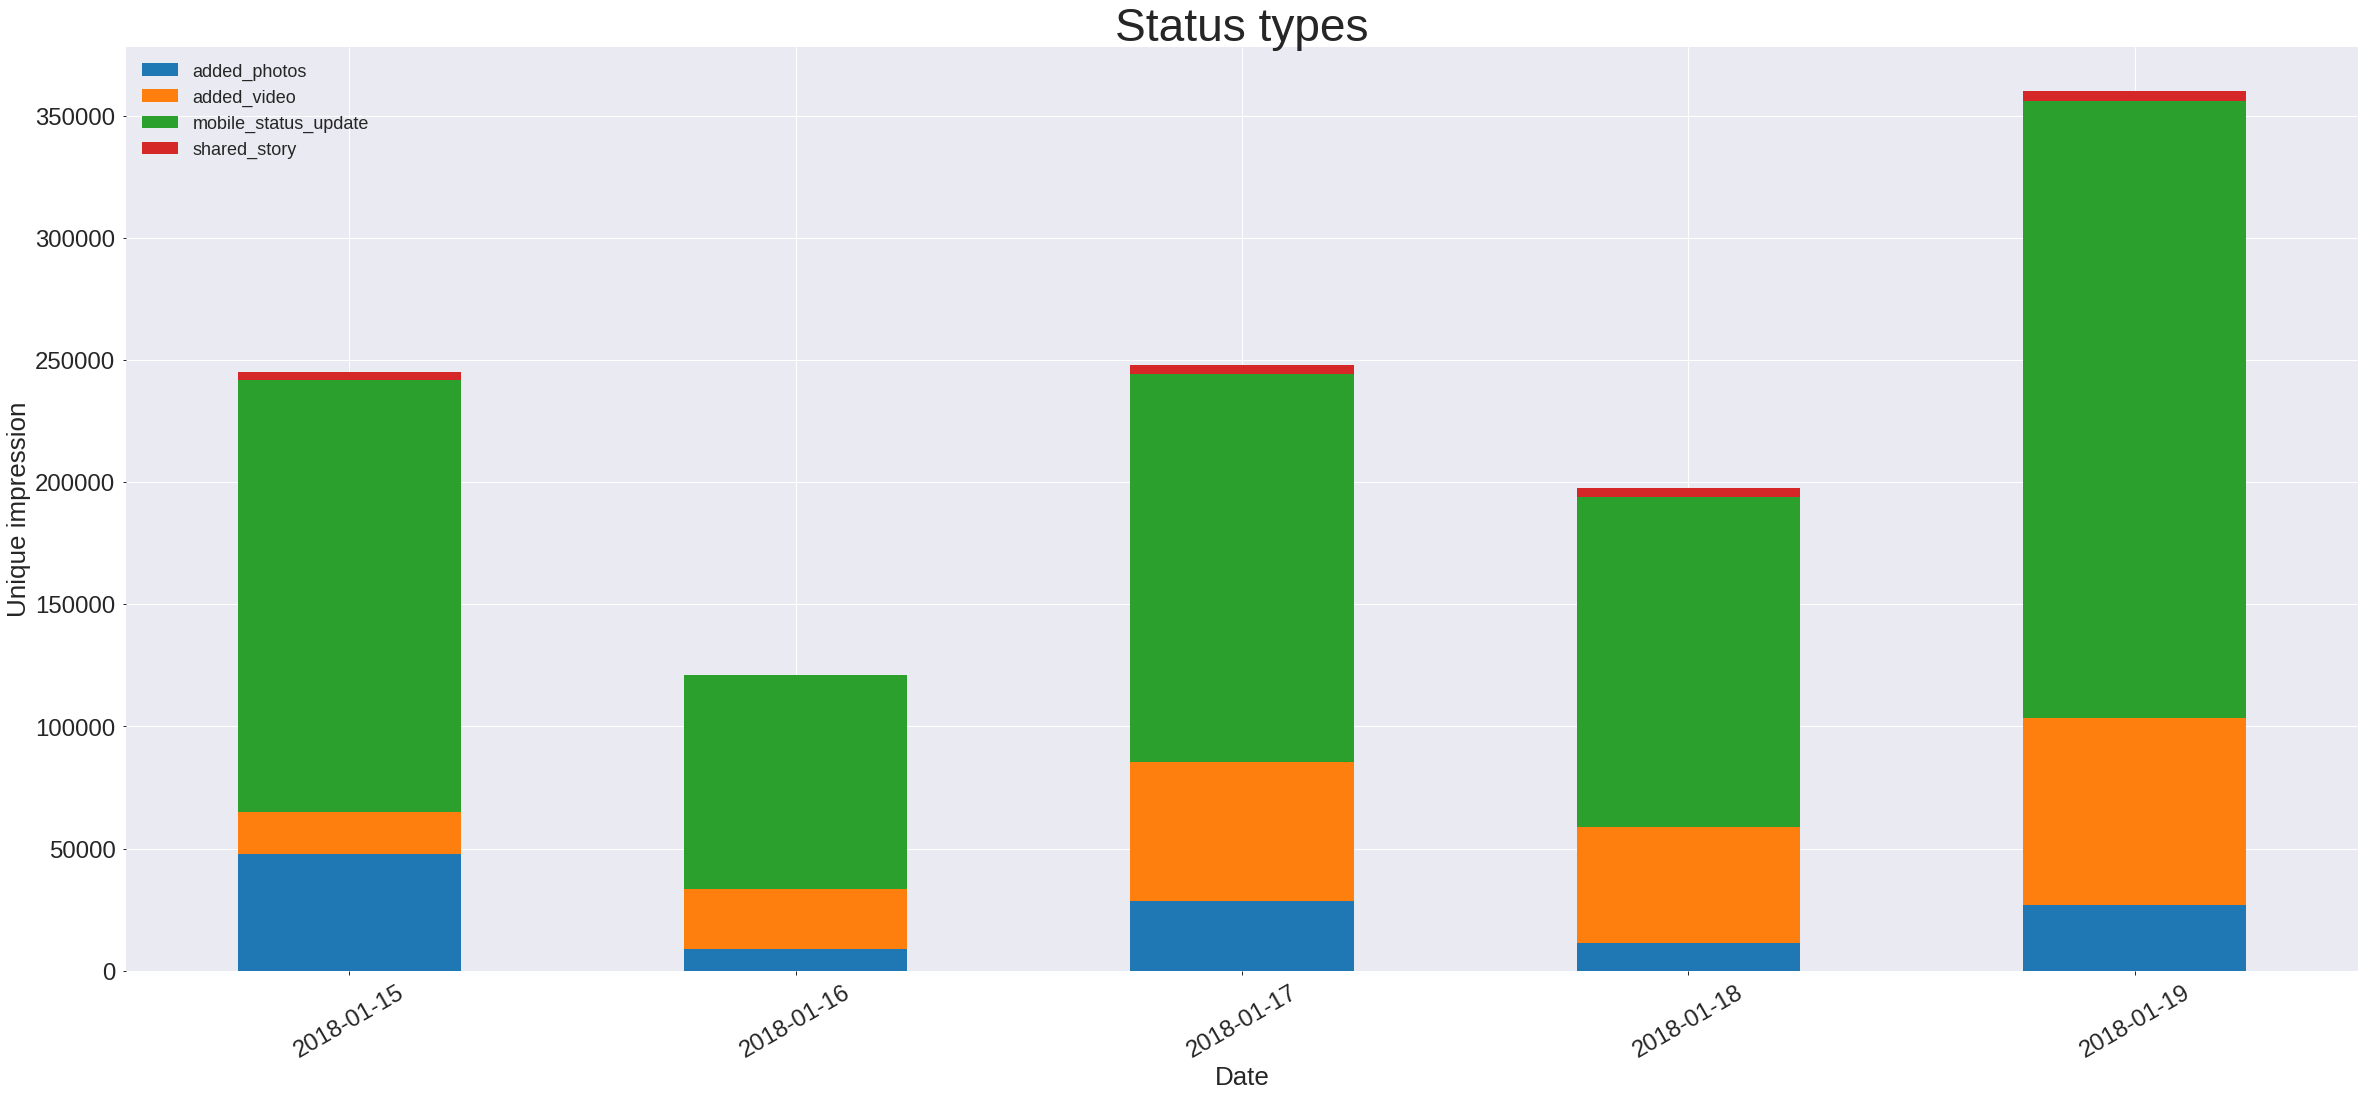

In [137]:
ct_extraction_status_type.plot.bar(stacked=True, figsize=(40,17))
plt.legend(loc=2, prop={'size': 18})
plt.title('Status types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Exctraction coefficient', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)

In [138]:
ct_extraction_caption_type = pd.crosstab(reached_df['created_date'], reached_df['caption'], values=reached_df['extraction_coef'], aggfunc='sum')

In [139]:
ct_extraction_caption_type.replace([np.inf, -np.inf], np.nan, inplace=True)

In [140]:
ct_extraction_caption_type

caption,amostars.com,bolde.com,boredpanda.com,fabiosa.guru,ia.meaww.com,littlethings.com,mambee.com,shared.com,throwbacks.com,vix.com,wideopencountry.com,wink.guru
created_date,,,,,,,,,,,,
2018-01-15,196.185807,NaN,256.661500,2368.646760,NaN,95.062032,209.049101,24.894231,NaN,NaN,NaN,NaN
2018-01-16,167.724348,36.554925,NaN,2312.425815,NaN,135.682339,186.454666,68.957895,16.579047,NaN,NaN,NaN
2018-01-17,154.240168,142.432602,144.034935,2838.422596,16.672664,41.039837,177.384255,125.038628,NaN,NaN,NaN,57.604082
2018-01-18,136.873524,205.861789,253.840385,2661.075662,35.267987,59.312938,160.689167,60.537262,NaN,197.962406,89.598923,NaN
2018-01-19,76.253659,205.655519,473.385537,2960.358259,22.043480,55.798752,184.760182,NaN,113.750144,56.489549,210.653941,NaN


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

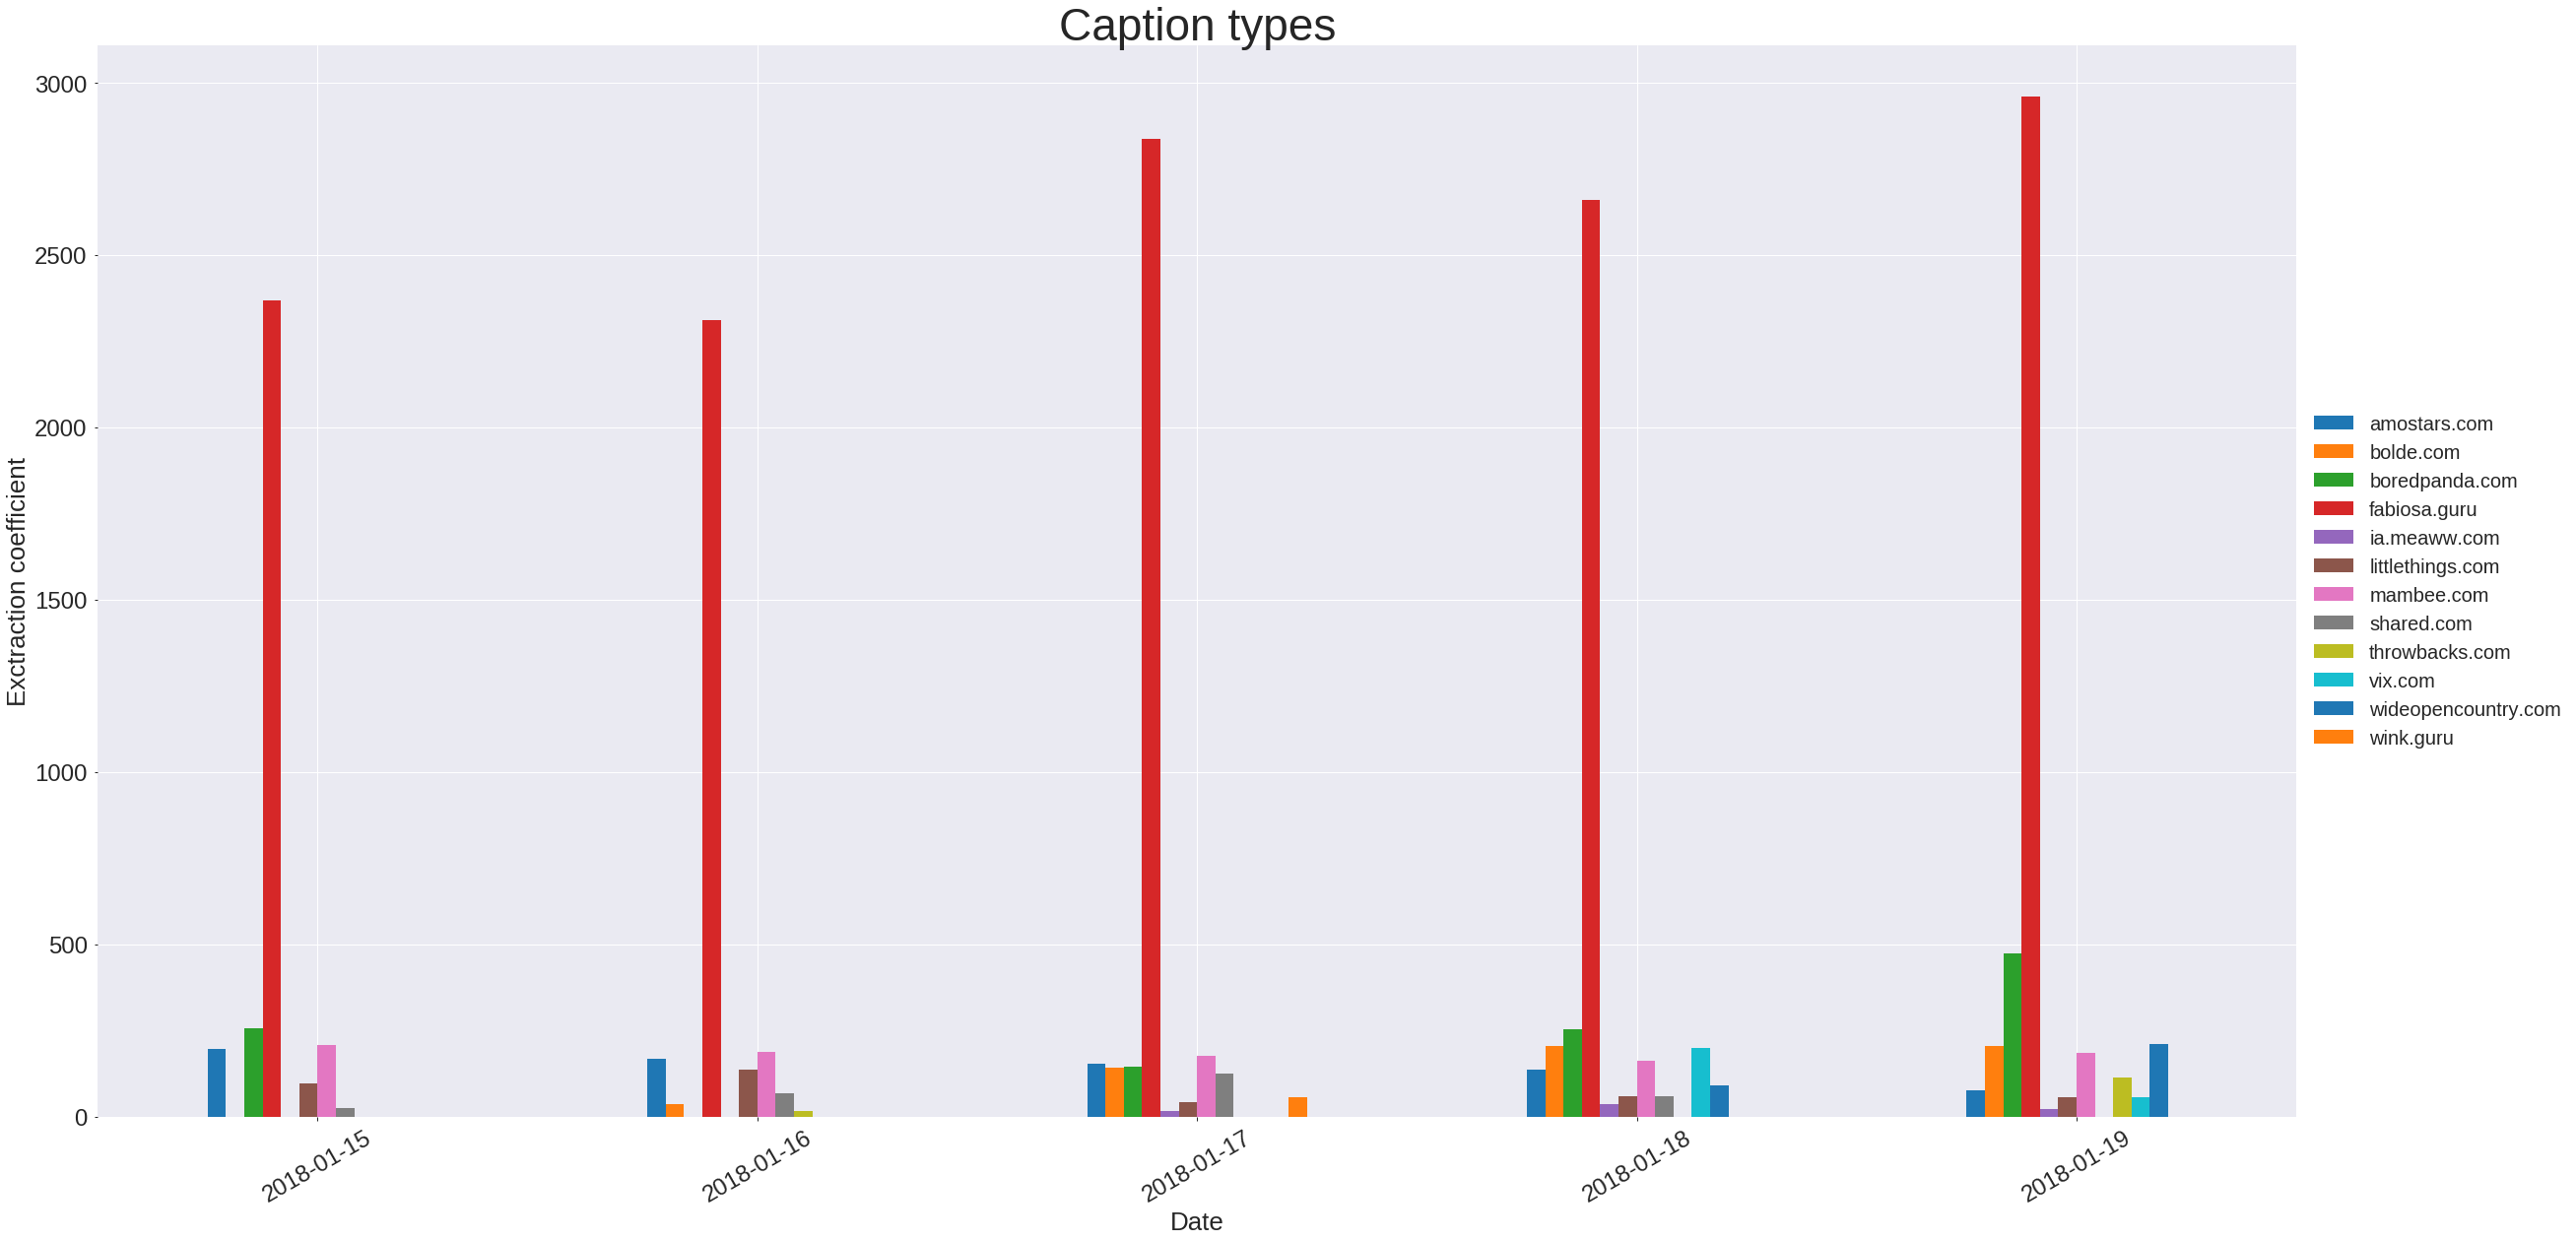

In [374]:
ct_extraction_caption_type.plot.bar(figsize=(40,20))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
plt.title('Caption types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Exctraction coefficient', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)

In [148]:
ct_extraction_story_type = pd.crosstab(reached_df['created_date'], reached_df['story'], values=reached_df['extraction_coef'], aggfunc='sum')

In [149]:
ct_extraction_story_type.replace([np.inf, -np.inf], np.nan, inplace=True)

In [150]:
ct_extraction_story_type

story,Wikr.com shared Family World's video.,Wikr.com shared Tips & Tricks's video.,Wikr.com with AmoStars.com.,Wikr.com with Bolde.com.,Wikr.com with Bored Panda.,Wikr.com with Family World.,Wikr.com with LittleThings.,Wikr.com with Meaww.,Wikr.com with Shared.,Wikr.com with Throwbacks.,Wikr.com with VIX.,Wikr.com with Wide Open Country.,Wikr.com with Wink.
created_date,,,,,,,,,,,,,
2018-01-15,43788.081197,133046.849471,196.185807,NaN,256.661500,209.049101,95.062032,NaN,24.894231,NaN,NaN,NaN,NaN
2018-01-16,29199.751984,58168.436429,152.589516,36.554925,NaN,186.454666,135.682339,NaN,68.957895,16.579047,NaN,NaN,NaN
2018-01-17,15520.522727,143126.076923,154.240168,142.432602,144.034935,177.384255,41.039837,16.672664,125.038628,NaN,NaN,NaN,57.604082
2018-01-18,56349.661765,78535.666667,136.873524,205.861789,253.840385,160.689167,59.312938,35.267987,60.537262,NaN,197.962406,89.598923,NaN
2018-01-19,171611.428571,80744.772409,76.253659,205.655519,473.385537,184.760182,55.798752,22.043480,NaN,113.750144,56.489549,210.653941,NaN


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]), <a list of 9 Text yticklabel objects>)

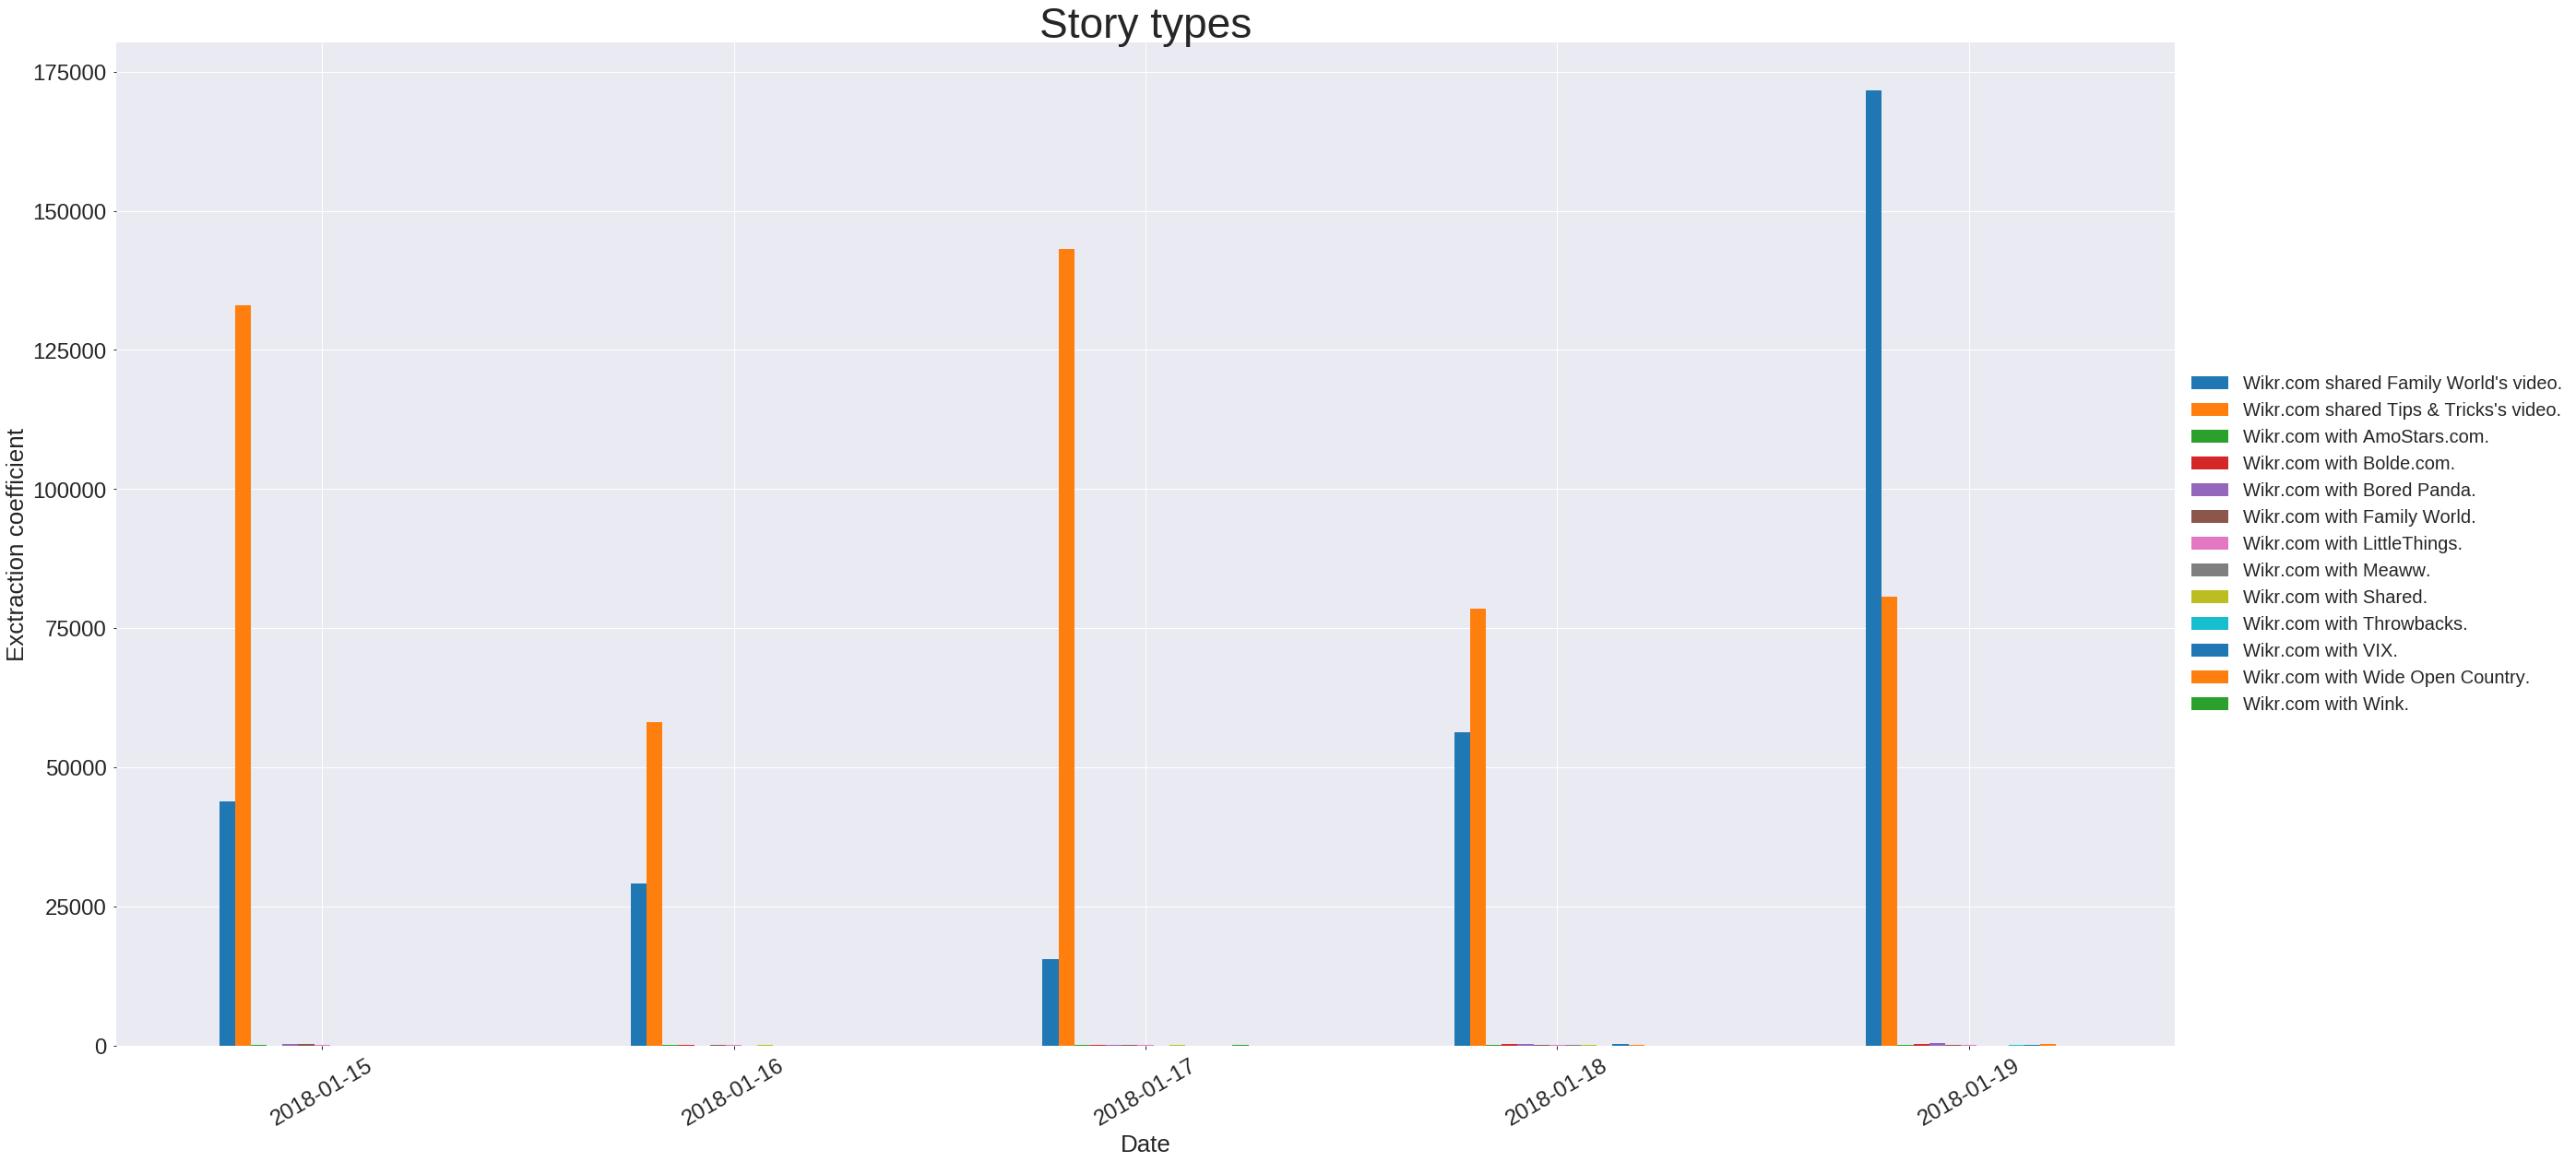

In [376]:
ct_extraction_story_type.plot.bar(figsize=(40,20))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
plt.title('Story types', fontsize=46)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Exctraction coefficient', fontsize=26)
plt.xticks(fontsize=24, rotation=30)
plt.yticks(fontsize=24)

# Пункт 7

In [349]:
likes = []
for i in reached_df.post_storytellers_by_action_type.apply(lambda x: ast.literal_eval(x)).index:
    try:
        likes.append(reached_df.post_storytellers_by_action_type.apply(lambda x: ast.literal_eval(x))[i]['like'])
    except:
        likes.append(0)

# Групируем данные по дате и находим топ 5 лайкнутых постов в каждой групе и визуализируем

In [350]:
reached_df['likes'] = likes

In [169]:
reached_df

,post_id,caption,created_datetime,from_group,link,message,name,parent_id,status_type,story,...,post_video_views,post_video_views_10s,post_video_view_time,post_video_avg_time_watched,post_stories_by_action_type,post_storytellers_by_action_type,time_from_published,link_ckicks_post_consumptions_by_type_unique,extraction_coef,likes
31,563554503788475_1278084155668836,NaN,2018-01-15 18:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/165608444009109/video...,5 unusual ideas for lamp design!,Tips & Tricks,165608444009109_210691262834160,mobile_status_update,Wikr.com shared Tips & Tricks's video.,...,48343,0,0,0,"{'like': 282, 'comment': 14}","{'like': 280, 'comment': 14}",09:59:06,7,22353.857143,280
78,563554503788475_1279214485555803,amostars.com,2018-01-15 04:30:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22170-kelly-ripas-marriag...,No way!,Kelly Ripa's marriage is not as simple as it s...,NaN,shared_story,Wikr.com with AmoStars.com.,...,0,0,0,0,"{'share': 3, 'like': 146, 'comment': 8}","{'share': 3, 'like': 146, 'comment': 8}",09:59:06,2210,10.914027,146
124,563554503788475_1279384765538775,amostars.com,2018-01-15 11:30:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22166-ricky-nelsons-daugh...,Ricky Nelson's daughter is a 54-year-old actre...,Ricky Nelson's daughter is a 54-year-old actre...,NaN,shared_story,Wikr.com with AmoStars.com.,...,0,0,0,0,"{'share': 31, 'like': 487, 'comment': 9}","{'share': 25, 'like': 476, 'comment': 7}",09:59:07,4496,8.422598,476
170,563554503788475_1279490172194901,amostars.com,2018-01-15 13:30:01,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22180-after-30-years-gold...,Just take a look at these touching photos!,"After 30 years together, Goldie Hawn and Kurt ...",NaN,shared_story,Wikr.com with AmoStars.com.,...,0,0,0,0,"{'share': 26, 'like': 1268, 'comment': 23}","{'share': 23, 'like': 1268, 'comment': 19}",09:59:06,2301,17.805737,1268
216,563554503788475_1279624938848091,NaN,2018-01-16 07:40:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.facebook.com/wikrcom/videos/127962...,It happens that we ask life for one thing and ...,It happens that we ask life for one thing and ...,NaN,added_video,NaN,...,21125,7905,492354142,7048,"{'share': 50, 'like': 192, 'comment': 3}","{'share': 51, 'like': 187, 'comment': 3}",09:59:06,5,16729.000000,187
263,563554503788475_1279857482158170,amostars.com,2018-01-16 04:31:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22205-beloved-jody-family...,Now he devotes himself to helping people,Beloved Jody from 'Family Affair' has complete...,NaN,shared_story,Wikr.com with AmoStars.com.,...,0,0,0,0,"{'share': 17, 'like': 156, 'comment': 1}","{'share': 17, 'like': 156, 'comment': 1}",09:58:06,1185,13.671730,156
309,563554503788475_1280012202142698,amostars.com,2018-01-16 09:30:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://amostars.com/22207-only-johnny-cashs-d...,Very interesting,Only after Johnny Cash's death did his daughte...,NaN,shared_story,Wikr.com with AmoStars.com.,...,0,0,0,0,"{'share': 21, 'like': 278, 'comment': 9}","{'share': 20, 'like': 278, 'comment': 9}",09:59:07,2745,11.514754,278
355,563554503788475_1280077755469476,bolde.com,2018-01-16 14:30:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://www.bolde.com/love-marry-boyfriend-can...,I'd Love To Marry My Boyfriend But I Can’t Sta...,I'd Love To Marry My Boyfriend But I Can’t Sta...,NaN,shared_story,Wikr.com with Bolde.com.,...,0,0,0,0,"{'share': 30, 'like': 254, 'comment': 364}","{'share': 28, 'like': 252, 'comment': 287}",09:59:06,2467,36.554925,252
400,563554503788475_1280173422126576,mambee.com,2018-01-16 13:50:00,"{'name': 'Wikr.com', 'id': '563554503788475'}",https://mambee.com/rsnn-aujkl-pnn-meghan-markl...,Is it healthy for a couple to have an age diff...,Meghan Markle Is Older Than Prince Harry - Psy...,NaN,shared_story,Wikr.com with Fam

In [200]:
top_likes = reached_df.sort_values(['likes'],ascending=False).groupby('created_date').head(5)[['created_date','likes','link']].sort_values(['created_date'])

In [275]:
top_likes_for_plot = reached_df.sort_values(['likes'],ascending=False).groupby('created_date').head(5)[['created_date','likes','link']].sort_values(['created_date'])

In [233]:
top_likes_grouped = top_likes.set_index('created_date').groupby('created_date')

In [234]:
for key, item in top_likes_grouped:
    print(top_likes_grouped.get_group(key), "\n\n")

              likes                                               link
created_date                                                          
2018-01-15     7727  https://mambee.com/rsnn-auibs-pnn-they-were-to...
2018-01-15     5977  https://www.boredpanda.com/3d-pedestrian-cross...
2018-01-15     4235  https://fabiosa.guru/rssk-ausjv-pdar-phnkz-act...
2018-01-15     3975  https://mambee.com/rsnn-auibs-pnn-a-dad-and-hi...
2018-01-15     3569  https://www.boredpanda.com/retired-judge-build... 


              likes                                               link
created_date                                                          
2018-01-16      861  https://fabiosa.guru/rsyt-aumts-phkaz-pdkv-lov...
2018-01-16      869  https://www.facebook.com/wikrcom/videos/127976...
2018-01-16     1454  https://www.facebook.com/wikrcom/photos/a.5640...
2018-01-16     1806  https://fabiosa.guru/rsmgr-auble-pdkv-phdlkh-l...
2018-01-16      813  https://www.facebook.com/1776663672362366/vide... 




In [283]:
top_likes_for_plot['link'] = top_likes_for_plot['link'].str[:20]

In [284]:
top_likes_grouped_for_plot = top_likes_for_plot.set_index('created_date').groupby('created_date')

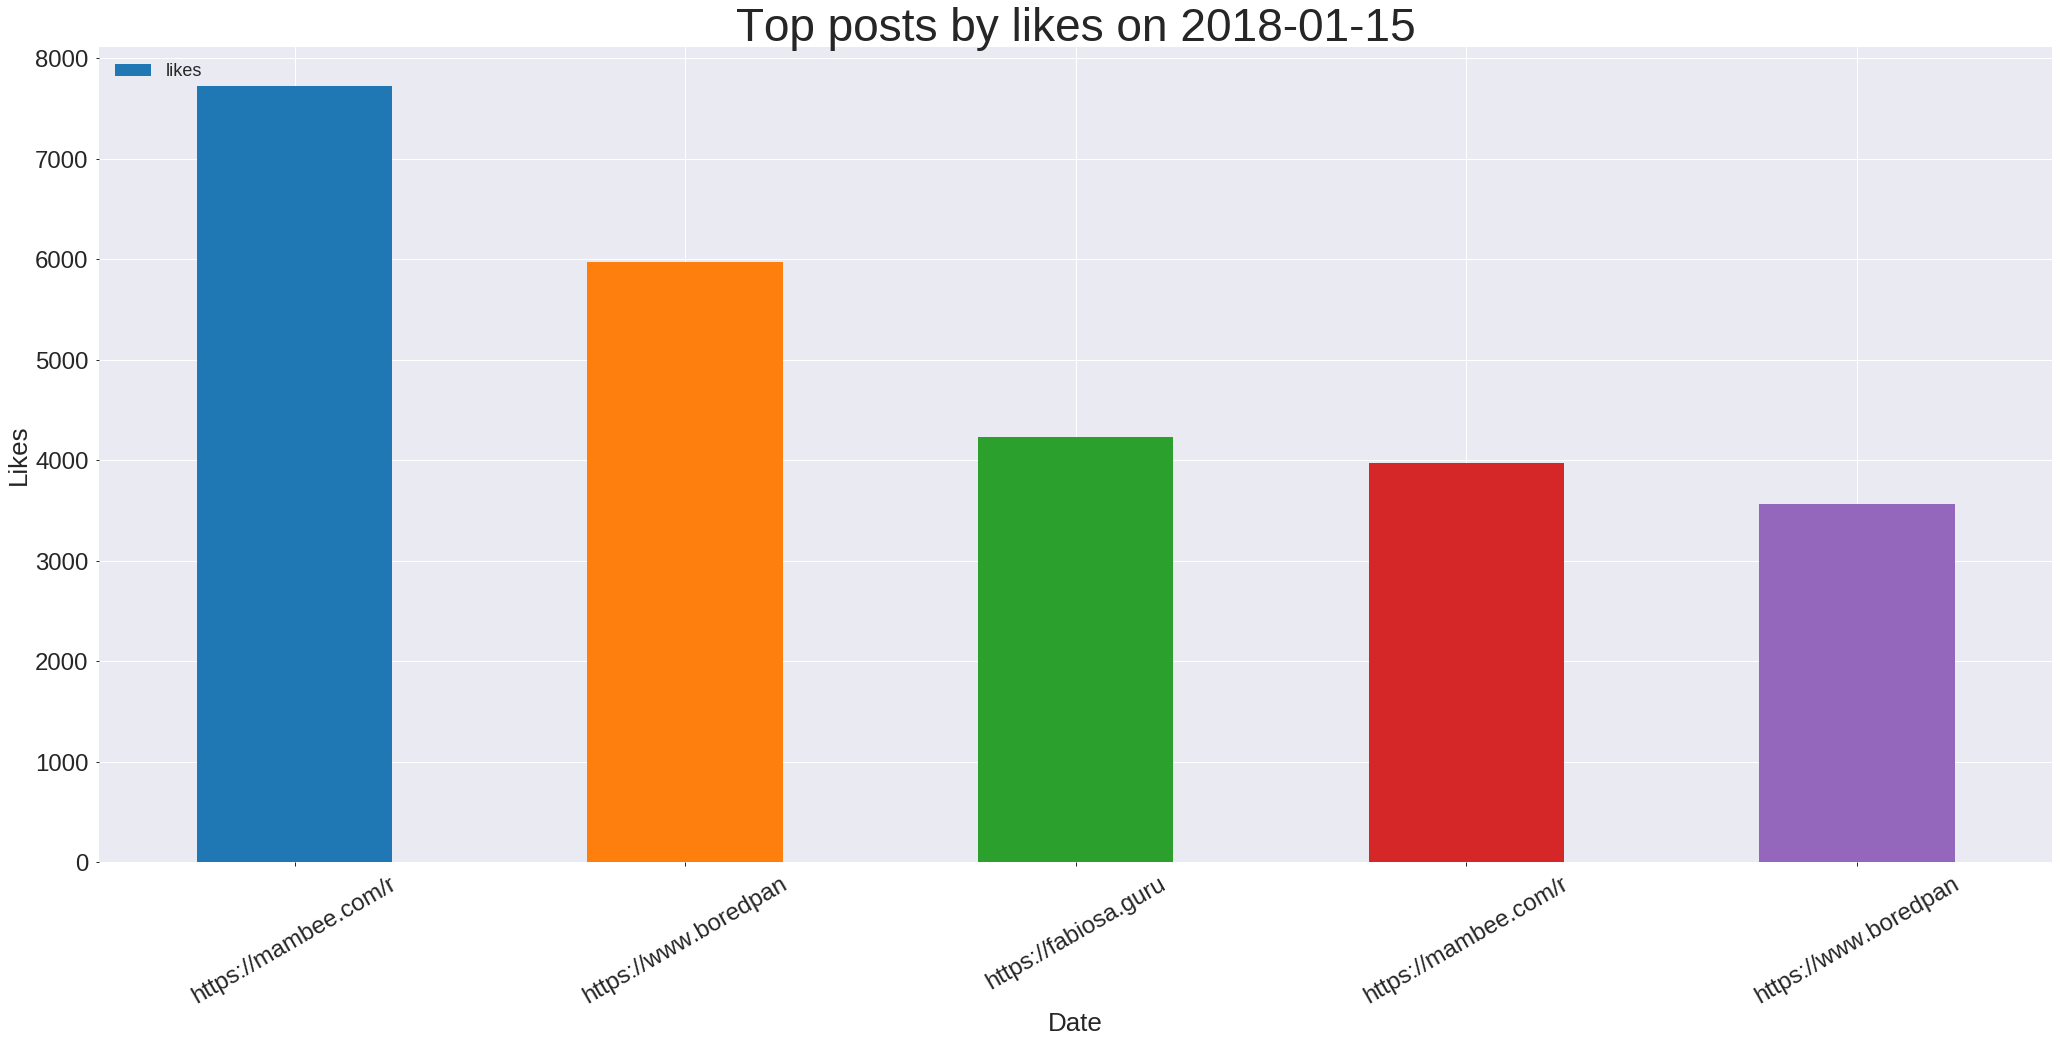

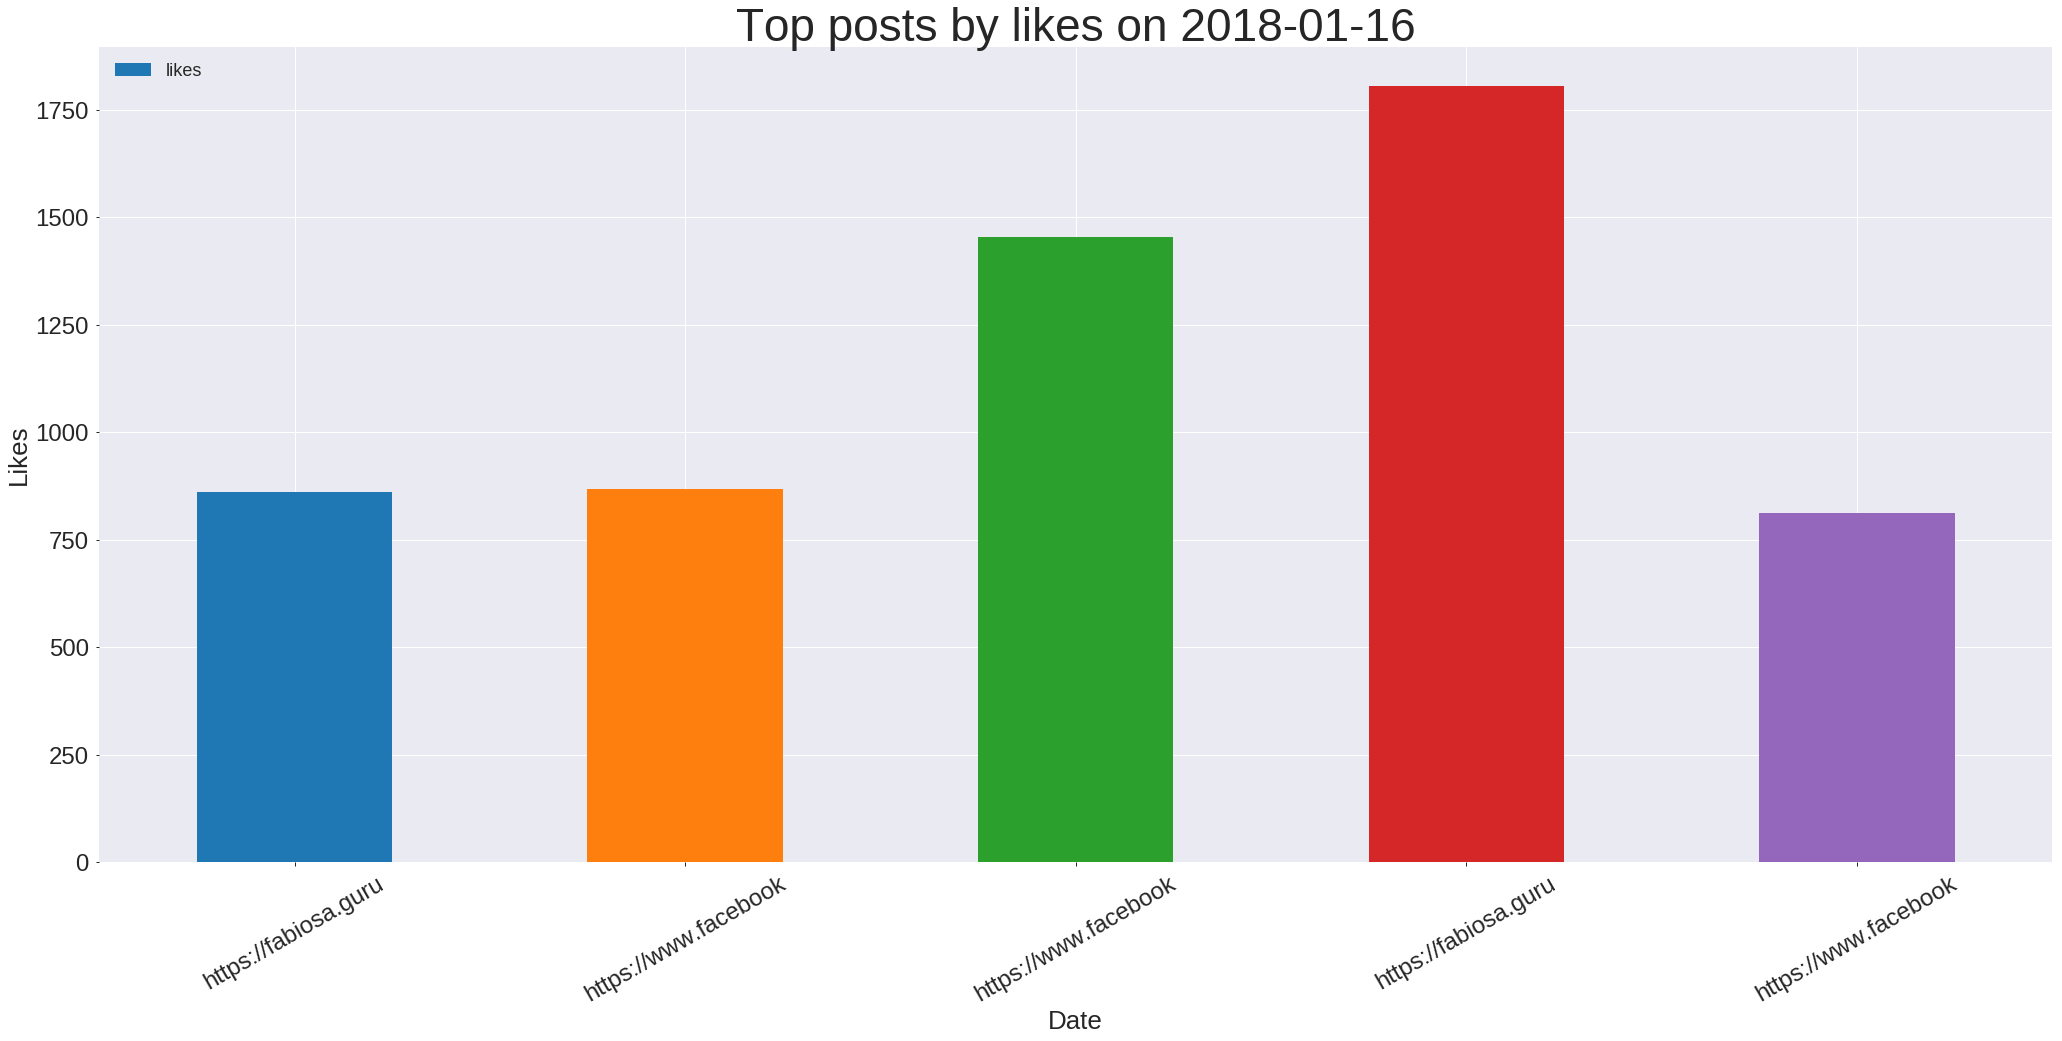

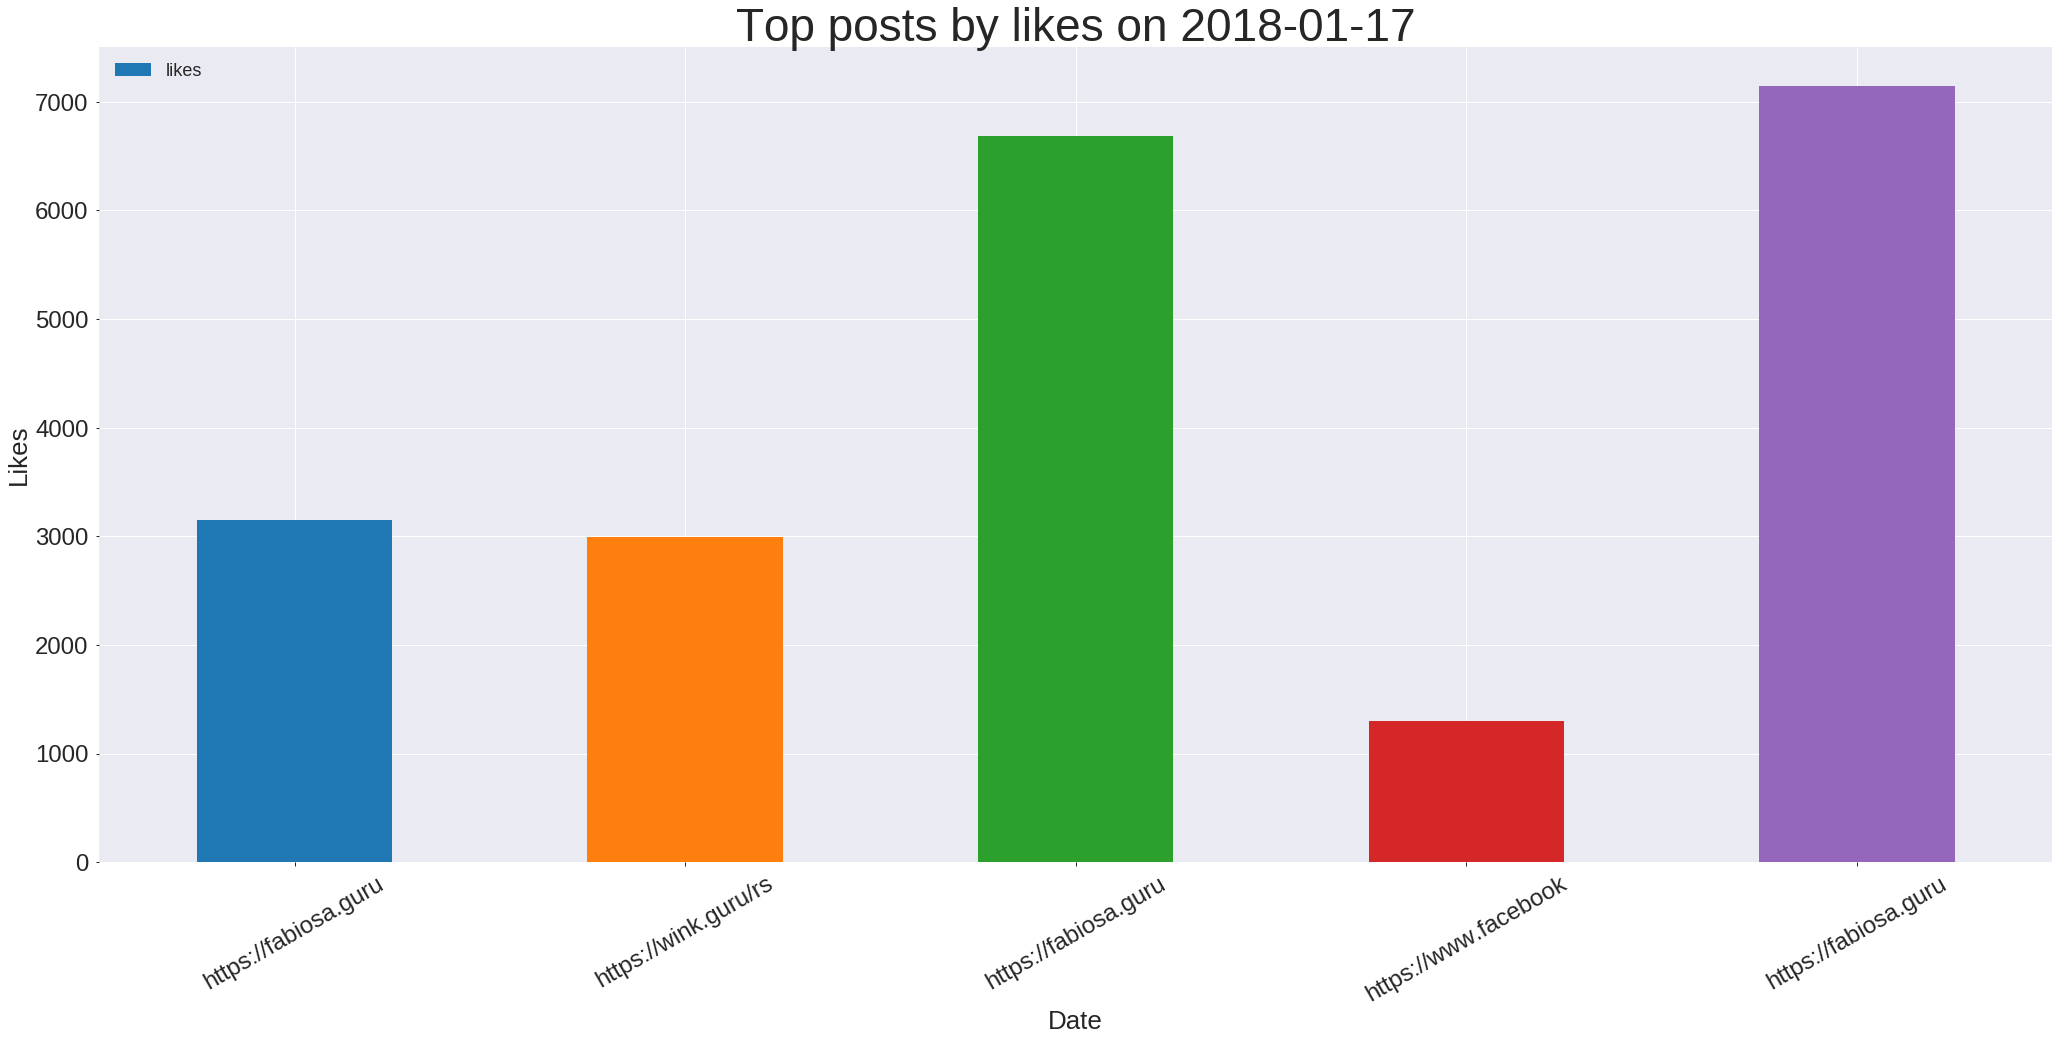

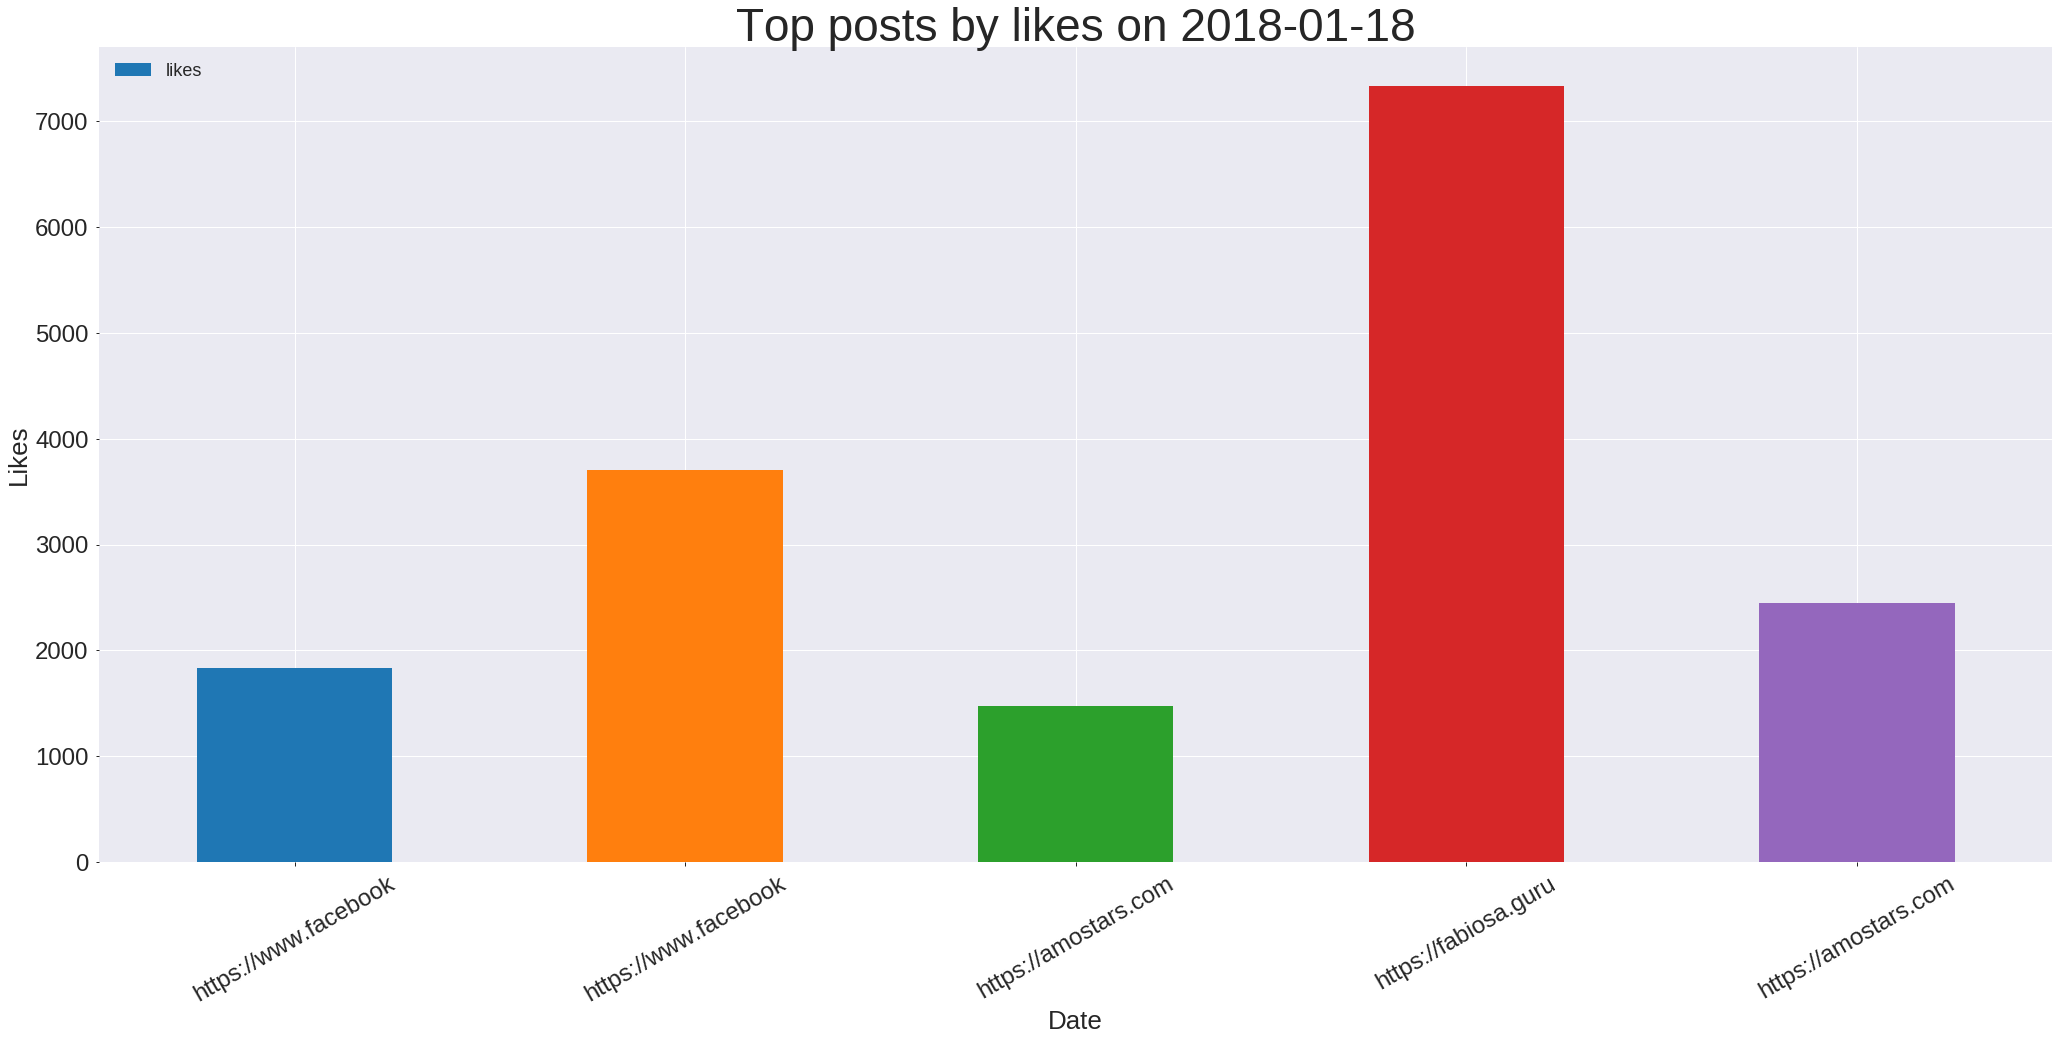

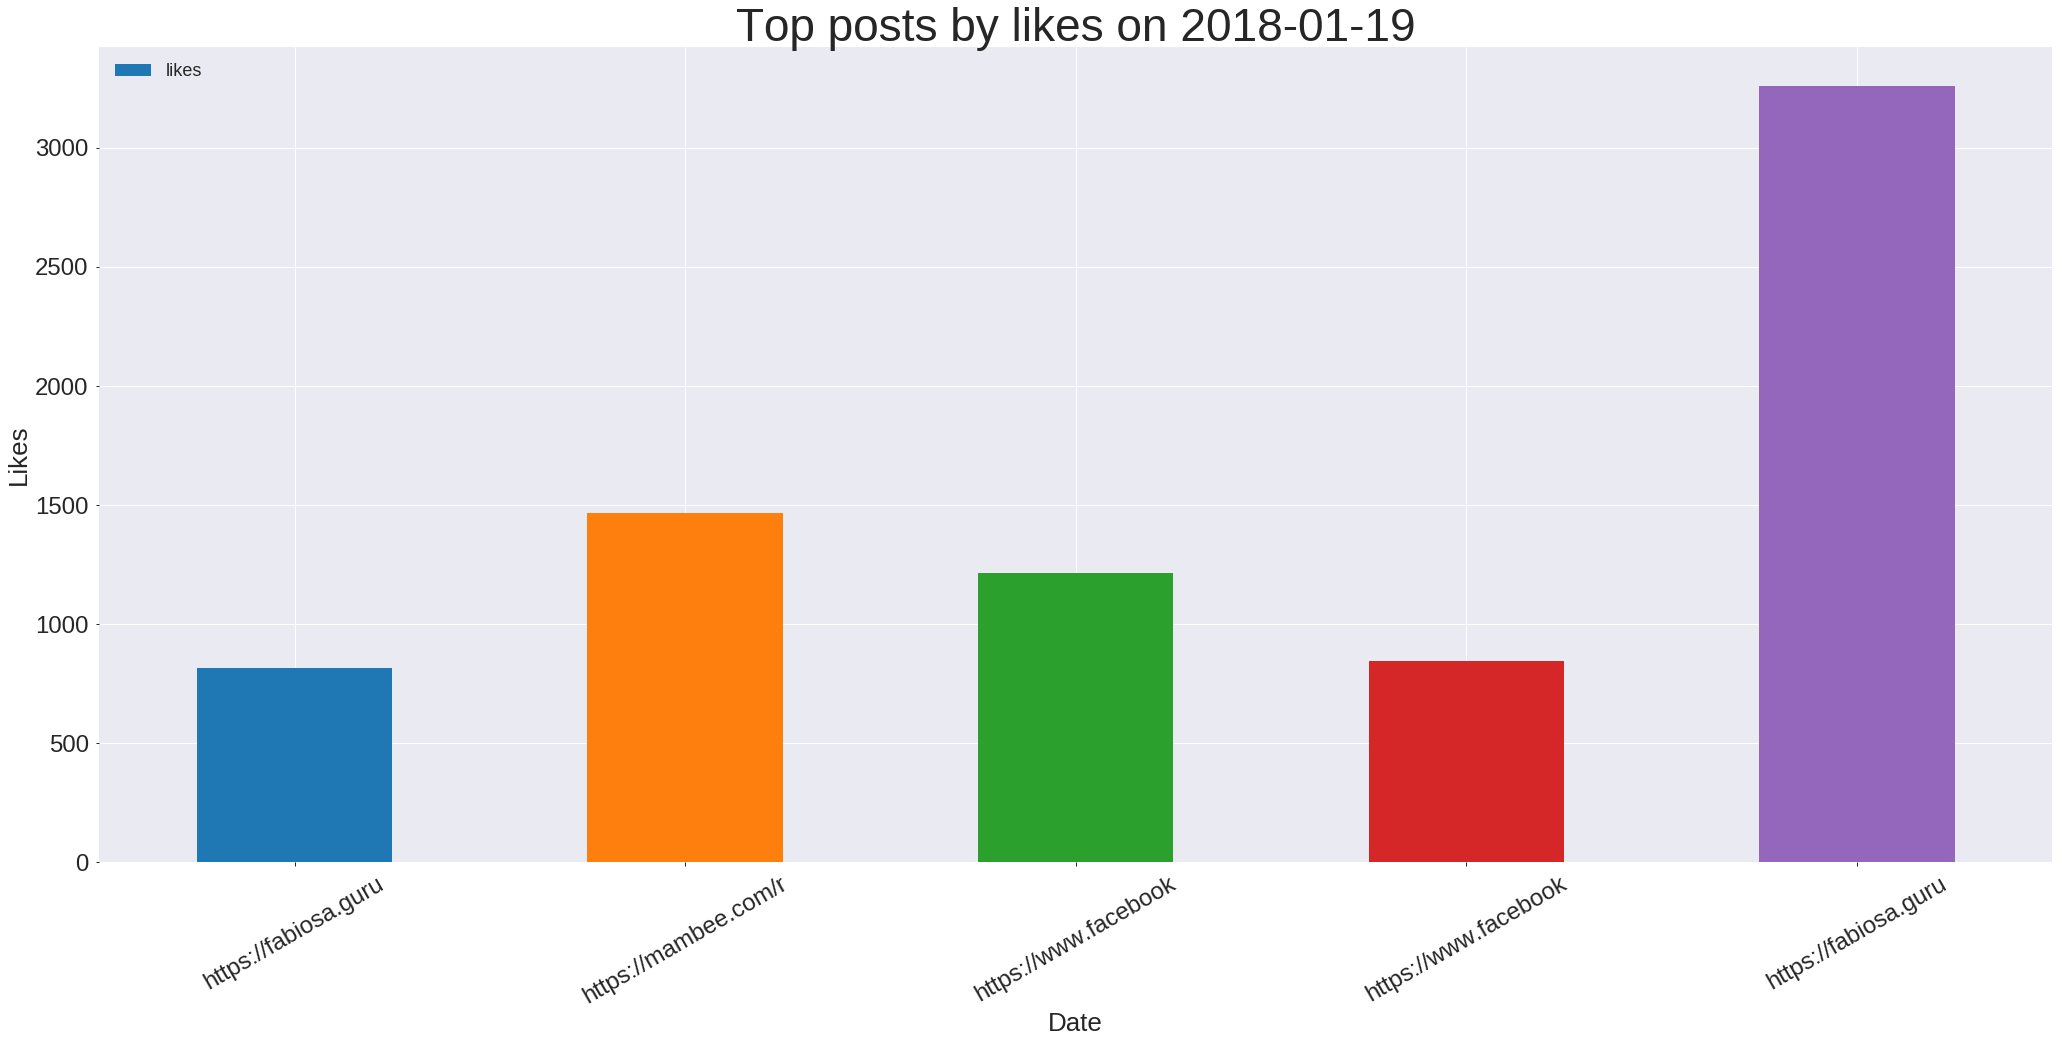

In [300]:
for i in top_likes_grouped_for_plot:
    i[1].plot(kind='bar', x='link',y='likes', figsize=(35,15))
    plt.legend(loc=2, prop={'size': 18})
    plt.title('Top posts by likes on ' + str(i[1].index[0]), fontsize=46)
    plt.xlabel('Date', fontsize=26)
    plt.ylabel('Likes', fontsize=26)
    plt.xticks(fontsize=24, rotation=30)
    plt.yticks(fontsize=24)

# Пункт 8

In [305]:
merged_df[merged_df['type_of_post'] == 'video'].columns

Index(['post_id', 'caption', 'created_datetime', 'from_group', 'link',
       'message', 'name', 'parent_id', 'status_type', 'story', 'type_of_post',
       'created_date', 'created_time', 'update_time',
       'post_consumptions_by_type', 'post_consumptions_by_type_unique',
       'post_impressions', 'post_impressions_unique', 'post_impressions_viral',
       'post_impressions_viral_unique', 'post_video_views',
       'post_video_views_10s', 'post_video_view_time',
       'post_video_avg_time_watched', 'post_stories_by_action_type',
       'post_storytellers_by_action_type', 'time_from_published'],
      dtype='object')

# Выберем колонки которые нас интересуют

In [308]:
videos_df = merged_df[merged_df['type_of_post'] == 'video']

In [314]:
videos_df = videos_df[['message', 'name', 'status_type', 'story',
                       'created_date', 'created_time', 'update_time', 'time_from_published',
                       'post_video_views', 'post_video_views_10s', 'post_video_view_time',
                       'post_video_avg_time_watched',]]

In [315]:
videos_df.head()

,message,name,status_type,story,created_date,created_time,update_time,time_from_published,post_video_views,post_video_views_10s,post_video_view_time,post_video_avg_time_watched
0,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 18:44:06,00:04:06,0,0,0,0
1,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 18:49:06,00:09:06,0,0,0,0
2,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 18:54:06,00:14:06,1042,0,0,0
3,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 18:59:06,00:19:06,2763,0,0,0
4,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 19:04:06,00:24:06,4209,0,0,0


In [316]:
# Возьмем данные которые имеют 	time_from_published больше 1 часа

In [328]:
videos_df = videos_df[videos_df.time_from_published.dt.seconds//3600 >= 1]

In [329]:
videos_df.head()

,message,name,status_type,story,created_date,created_time,update_time,time_from_published,post_video_views,post_video_views_10s,post_video_view_time,post_video_avg_time_watched
24,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 21:39:07,02:59:07,25621,0,0,0
25,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 22:39:07,03:59:07,30940,0,0,0
26,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-15 23:39:07,04:59:07,35421,0,0,0
27,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-16 00:39:06,05:59:06,38340,0,0,0
28,5 unusual ideas for lamp design!,Tips & Tricks,mobile_status_update,Wikr.com shared Tips & Tricks's video.,2018-01-15,18:40:00,2018-01-16 01:39:06,06:59:06,41293,0,0,0


# Выведем статистику и профайл датасета

In [333]:
videos_df[['post_video_views','post_video_views_10s','post_video_view_time','post_video_avg_time_watched']].describe()

,post_video_views,post_video_views_10s,post_video_view_time,post_video_avg_time_watched
count,1161.000000,1161.000000,1.161000e+03,1161.000000
mean,44806.711456,4264.546942,3.322507e+08,2228.519380
std,30697.671707,12019.036002,1.041942e+09,5606.562217
min,4513.000000,0.000000,0.000000e+00,0.000000
25%,22960.000000,0.000000,0.000000e+00,0.000000
50%,33958.000000,0.000000,0.000000e+00,0.000000
75%,61077.000000,0.000000,0.000000e+00,0.000000
max,160891.000000,70131.000000,7.784323e+09,26058.000000


In [334]:
pp.ProfileReport(videos_df)

Number of variables,13
Number of observations,1161
Total Missing (%),2.0%
Total size in memory,118.0 KiB
Average record size in memory,104.1 B
Numeric,3
Categorical,7
Boolean,0
Date,1
Text (Unique),0
Rejected,2


# видим что post_video_view_time, post_video_avg_time_watchedб post_video_views_10s имеют очень много нулей
# при этом в данных по 40 000 просмотров, возможно проблема в том что API Facebook, считает просмотром даже влючившиеся в идео в фоновом режиме, а время просмотра не считает